In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpi
import json

from contrastive.utils.config import get_config_diff

In [3]:
path = "/home/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Output/supervised/densenet"
get_config_diff(path)

In [4]:
def exclude_conditions(diff_config, excluded_conditions):
    excluded_subdirs = []
    for cond in excluded_conditions:
        filtered_diff_config = diff_config.query(cond)
        excluded_subdirs.extend(filtered_diff_config['Unnamed: 0'].values)
    return excluded_subdirs

dir_path = "/home/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Output/supervised/densenet"
diff_config = pd.read_csv(dir_path+'/config_diff.csv')
diff_config

#exclude_conditions(diff_config, excluded_conditions=["lr != 0.0004"])

Unnamed: 0  drop_rate  \
0                             tau-0.1_drop-0.0       0.00   
1                             tau-0.1_drop-0.1       0.10   
2                             tau-0.5_drop-0.0       0.00   
3                           tau-0.5_drop-0.0_2       0.00   
4                           tau-0.5_drop-0.0_3       0.00   
5         tau-0.5_drop-0.0_percentage-variable       0.00   
6                             tau-0.5_drop-0.1       0.10   
7                            tau-0.5_drop-0.15       0.15   
8     tau-0.5_drop-0.15_percentage-variable-75       0.15   
9   tau-0.5_drop-0.15_percentage-variable-75_2       0.15   
10                          tau-0.5_drop-0.1_2       0.10   
11            tau-0.5_drop-0.2_drop-output-0.0       0.20   
12            tau-0.5_drop-0.2_drop-output-0.1       0.20   

    early_stopping_patience  max_epochs  temperature  temperature_initial  \
0                       250         300          0.1                  0.1   
1                       250         300          0.1                  0.5   
2                       250         300          0.5                  0.5   
3                       250         300          0.5                  0.5   
4                       250         300          0.5                  0.5   
5                       250         300          0.5                  0.5   
6                       250         300          0.5                  0.5   
7                       250         300          0.5                  0.5   
8                       250         300          0.5                  0.5   
9                       100         301          0.5                  0.5   
10                      250         300          0.5                  0.5   
11                      250         300          0.5                  0.5   
12                      250         300          0.5                  0.5   

                                   train_val_csv_file backbone_name  
0   /neurospin/dico/data/deep_folding/current/data...           NaN  
1   /neurospin/dico/data/deep_folding/current/data...           NaN  
2   /neurospin/dico/data/deep_folding/current/data...           NaN  
3   /neurospin/dico/data/deep_folding/current/data...           NaN  
4   /neurospin/dico/data/deep_folding/current/data...           NaN  
5   /neurospin/dico/data/deep_folding/current/data...           NaN  
6   /neurospin/dico/data/deep_folding/current/data...           NaN  
7   /neurospin/dico/data/deep_folding/current/data...           NaN  
8   /neurospin/dico/data/deep_folding/current/data...           NaN  
9                                                 NaN      densenet  
10  /neurospin/dico/data/deep_folding/current/data...           NaN  
11  /neurospin/dico/data/deep_folding/current/data...           NaN  
12  /neurospin/dico/data/deep_folding/current/data...           NaN

In [5]:
def show_results(dir_path, figsize=(16,10), return_config_diff=False, excluded_conditions=[]):
    # be sure that all models are comparable
    get_config_diff(dir_path, whole_config=False)
    diff_config = pd.read_csv(dir_path+'/config_diff.csv')

    excluded_subdirs = exclude_conditions(diff_config, excluded_conditions)
    if excluded_conditions != []:
        print("Excluded subdirs :", excluded_subdirs)
        print("Excluded because of ", excluded_conditions)

    print(diff_config[~diff_config['Unnamed: 0'].isin(excluded_subdirs)])

    paths = []
    accuracy = []
    accuracy_std = []
    auc = []
    auc_std = []
    # plot all ROC curves
    for subdir in os.listdir(dir_path):
        if os.path.isdir(dir_path + '/' + subdir) and subdir not in excluded_subdirs:
            path = dir_path + '/' + subdir + '/cingulate_ACCpatterns_embeddings'
            with open(path+'/values.json', 'r') as file:
                values = json.load(file)
            print(subdir)
            print("AUC", values['cross_val_auc'])
            img = mpi.imread(path+'/cross_val_ROC_curves.png')
            plt.figure(figsize=figsize)
            plt.imshow(img)
            plt.show()

            # store the AUC and accuracy in a df
            paths.append(subdir)
            accuracy.append(values['cross_val_total_accuracy'][0])
            accuracy_std.append(values['cross_val_total_accuracy'][1])
            auc.append(values['cross_val_auc'][0])
            auc_std.append(values['cross_val_auc'][1])

    results_df = pd.DataFrame()
    results_df['path'] = paths
    results_df['auc'] = auc
    results_df['auc_std'] = auc_std
    results_df['accuracy'] = accuracy
    results_df['accuracy_std'] = accuracy_std


    if return_config_diff:
        return results_df, diff_config
    else:
        return results_df

                        Unnamed: 0  sigma
0        NEOFAC_C_sigma-labels-0.1      5
1  NEOFAC_C_sigma-labels-5_sigma-3      3
2                         gender_1      5
3                         gender_2      5
4                        without_1      5
without_1
AUC [0.49269839255499154, 0.04209205252090802]


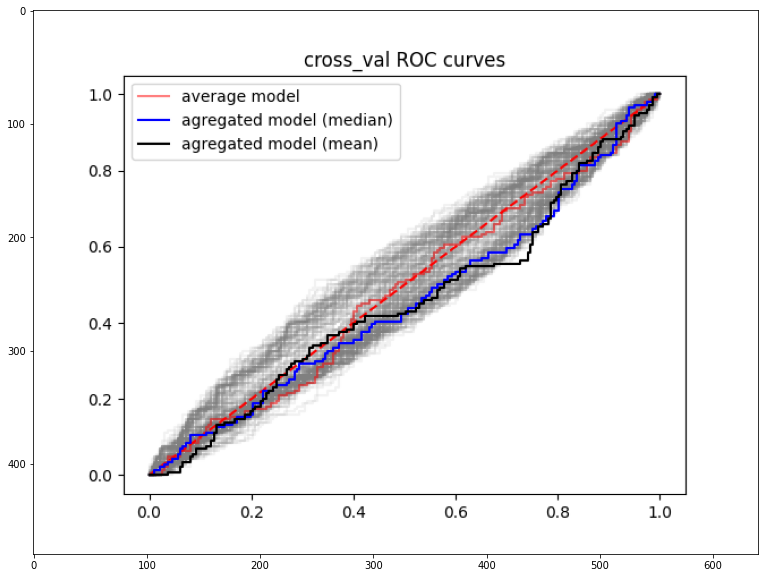

NEOFAC_C_sigma-labels-5_sigma-3
AUC [0.5396126621545404, 0.04795620171765857]


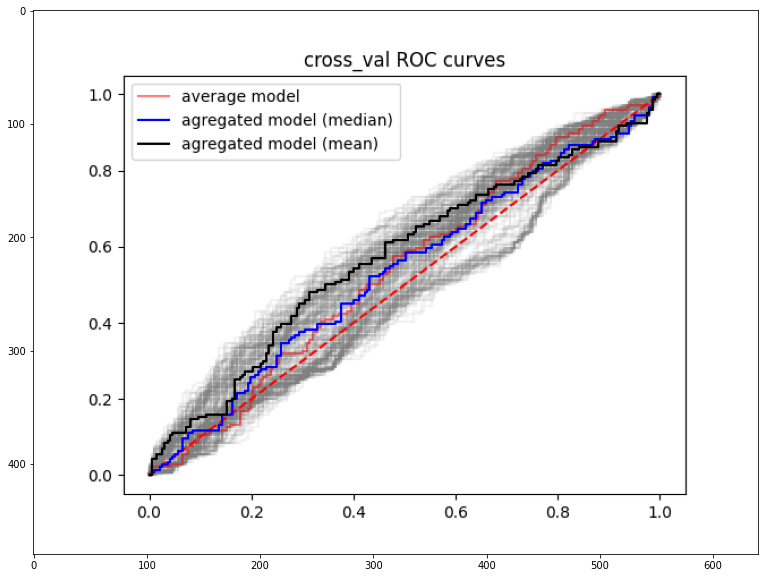

NEOFAC_C_sigma-labels-0.1
AUC [0.5062147490129724, 0.04340096578196012]


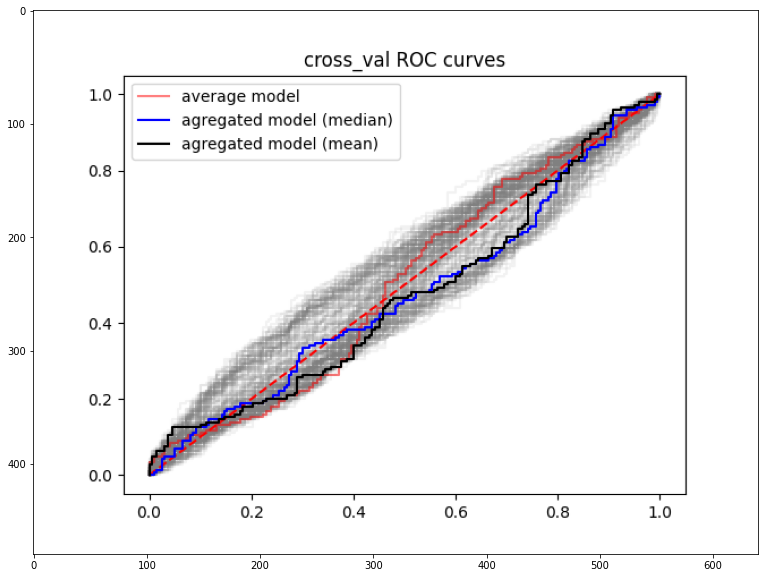

gender_1
AUC [0.5504772983643542, 0.04428989350264863]


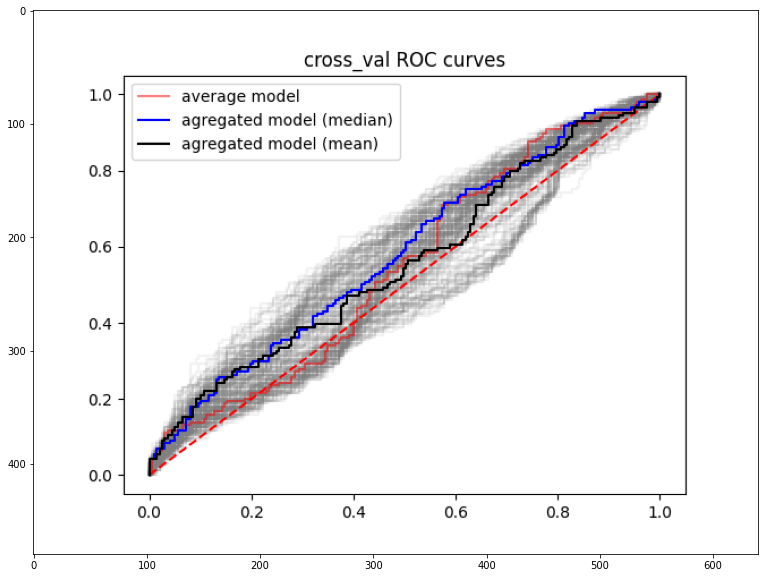

gender_2
AUC [0.5107298364354202, 0.03944776392199682]


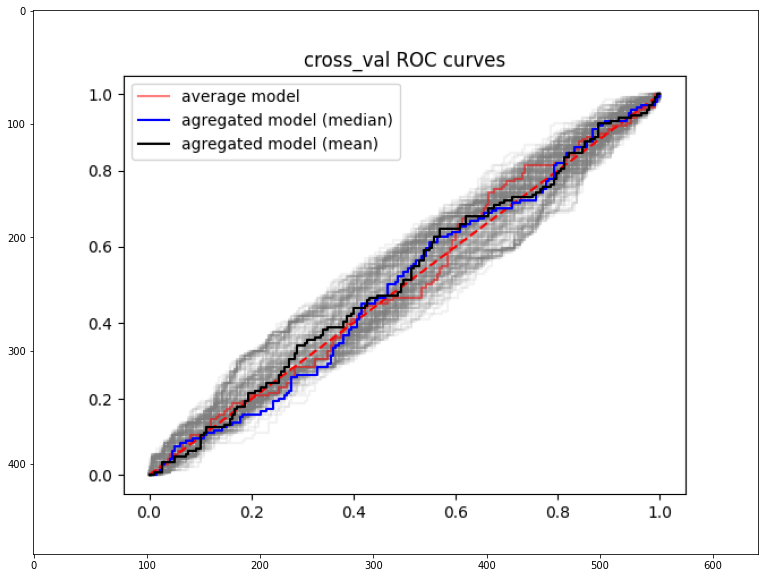

path       auc   auc_std  accuracy  accuracy_std
0                        without_1  0.492698  0.042092  0.499531      0.052253
1  NEOFAC_C_sigma-labels-5_sigma-3  0.539613  0.047956  0.510217      0.054896
2        NEOFAC_C_sigma-labels-0.1  0.506215  0.043401  0.510264      0.055733
3                         gender_1  0.550477  0.044290  0.511848      0.061090
4                         gender_2  0.510730  0.039448  0.510111      0.055633

In [6]:
excluded_conditions = []

results_df = show_results("/home/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Output/hcp_with_priors",
excluded_conditions=excluded_conditions)

results_df

In [7]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

path       auc
3                         gender_1  0.550477
1  NEOFAC_C_sigma-labels-5_sigma-3  0.539613
4                         gender_2  0.510730
2        NEOFAC_C_sigma-labels-0.1  0.506215
0                        without_1  0.492698

                                  Unnamed: 0  drop_rate  temperature  \
0                           tau-0.1_drop-0.0       0.00          0.1   
1                           tau-0.1_drop-0.1       0.10          0.1   
2                           tau-0.5_drop-0.0       0.00          0.5   
3                         tau-0.5_drop-0.0_2       0.00          0.5   
4                         tau-0.5_drop-0.0_3       0.00          0.5   
5       tau-0.5_drop-0.0_percentage-variable       0.00          0.5   
6                           tau-0.5_drop-0.1       0.10          0.5   
7                          tau-0.5_drop-0.15       0.15          0.5   
8   tau-0.5_drop-0.15_percentage-variable-75       0.15          0.5   
9                         tau-0.5_drop-0.1_2       0.10          0.5   
10          tau-0.5_drop-0.2_drop-output-0.0       0.20          0.5   
11          tau-0.5_drop-0.2_drop-output-0.1       0.20          0.5   

    temperature_initial  
0                   0.1  
1          

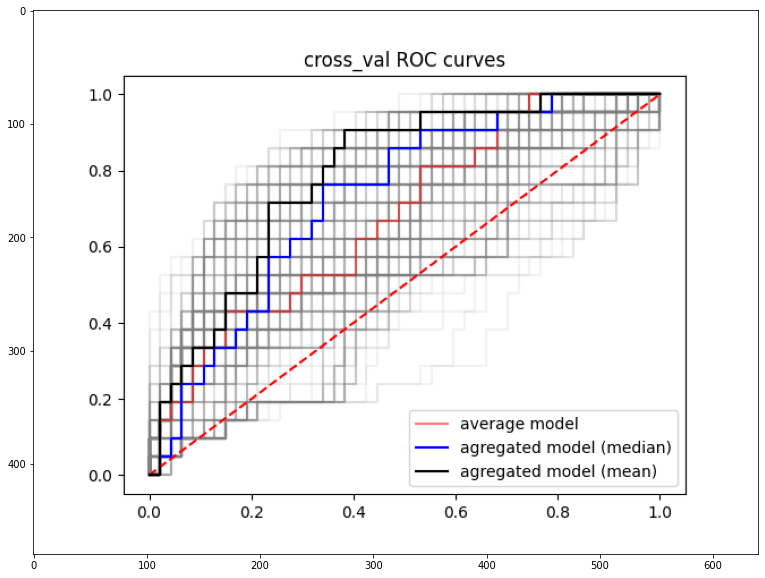

tau-0.1_drop-0.1
AUC [0.5578399189463018, 0.06382768250498178]


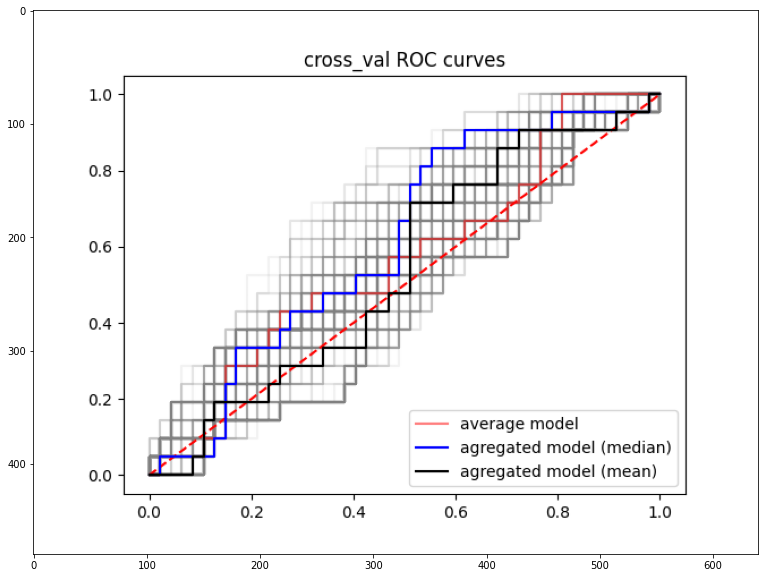

tau-0.5_drop-0.0_3
AUC [0.7904275582573455, 0.08015607895434278]


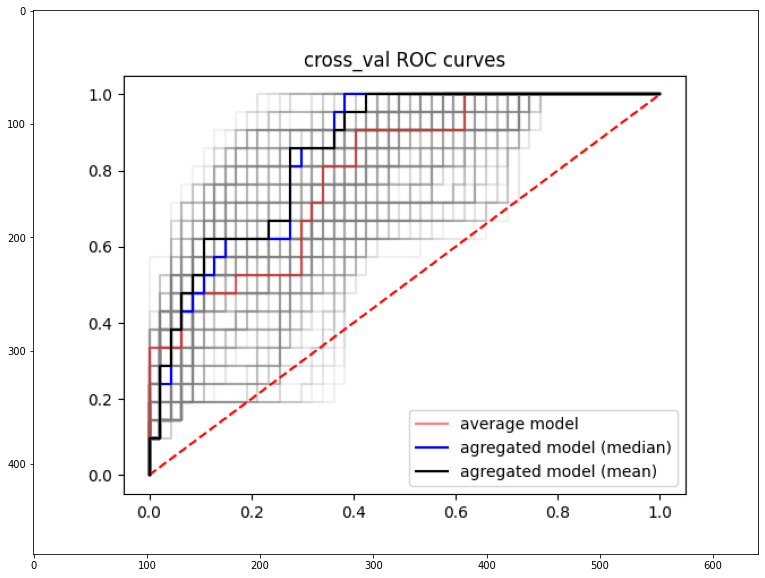

tau-0.5_drop-0.1
AUC [0.6520567375886525, 0.10145402908193465]


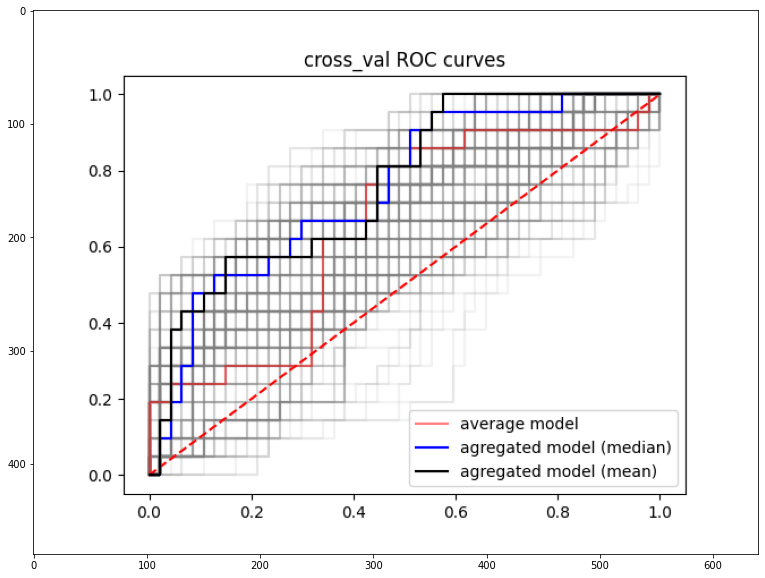

tau-0.5_drop-0.2_drop-output-0.1
AUC [0.6923606889564337, 0.07886553978647642]


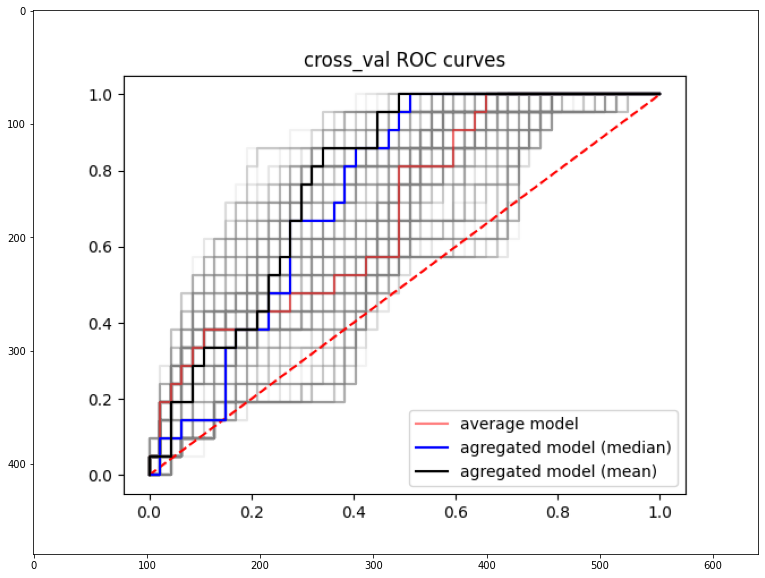

tau-0.5_drop-0.2_drop-output-0.0
AUC [0.7259777102330294, 0.08000158338515732]


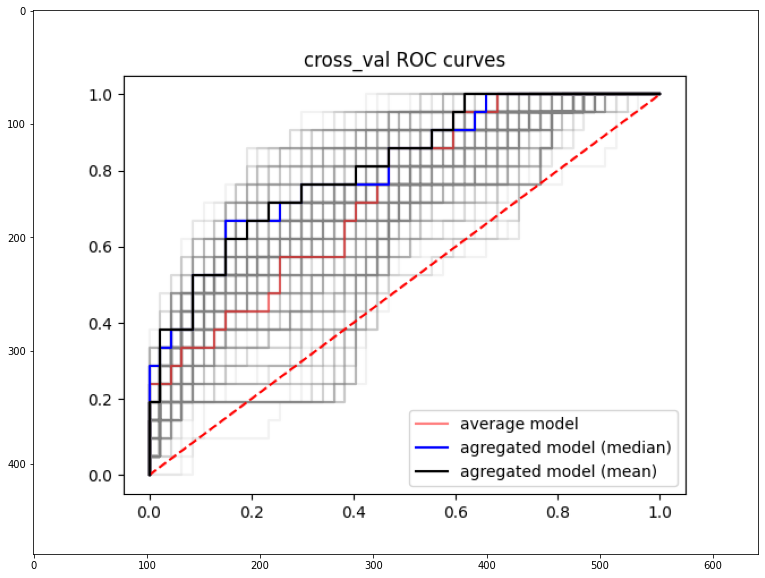

tau-0.5_drop-0.1_2
AUC [0.5841337386018238, 0.11891015538964823]


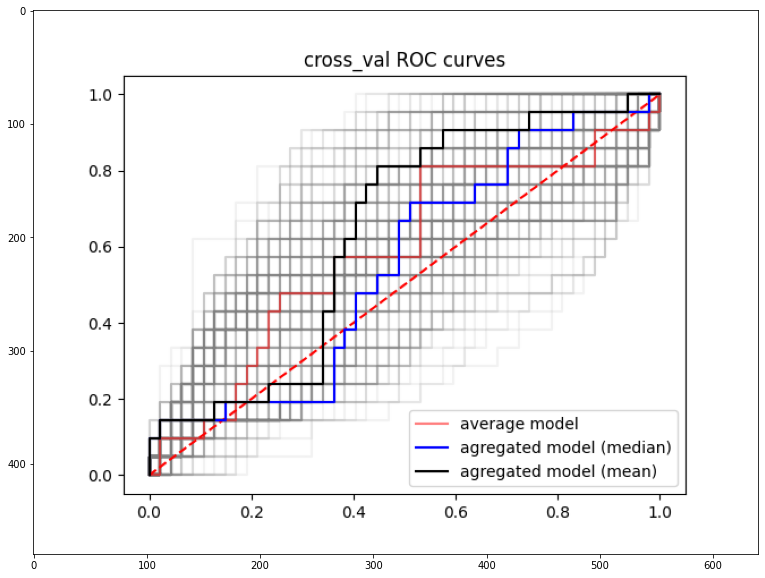

tau-0.5_drop-0.15
AUC [0.5959311043566363, 0.07369135091043935]


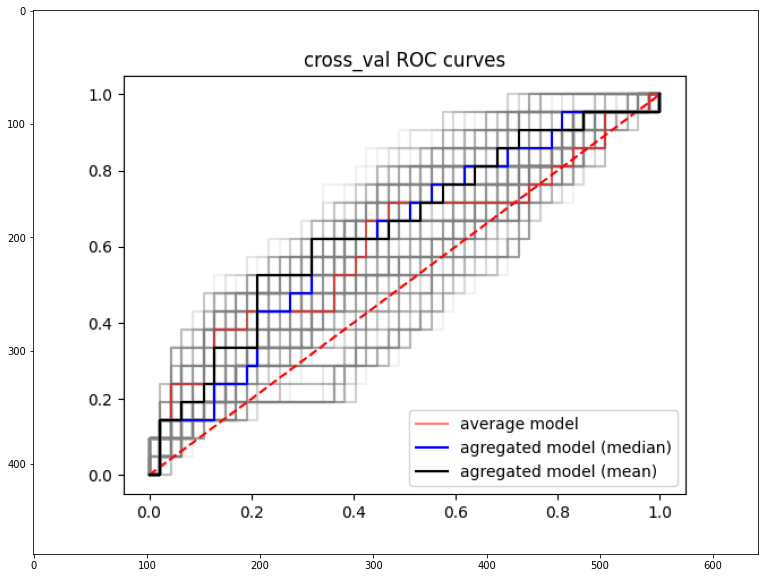

tau-0.5_drop-0.0_percentage-variable
AUC [0.7088267477203647, 0.08142184287170307]


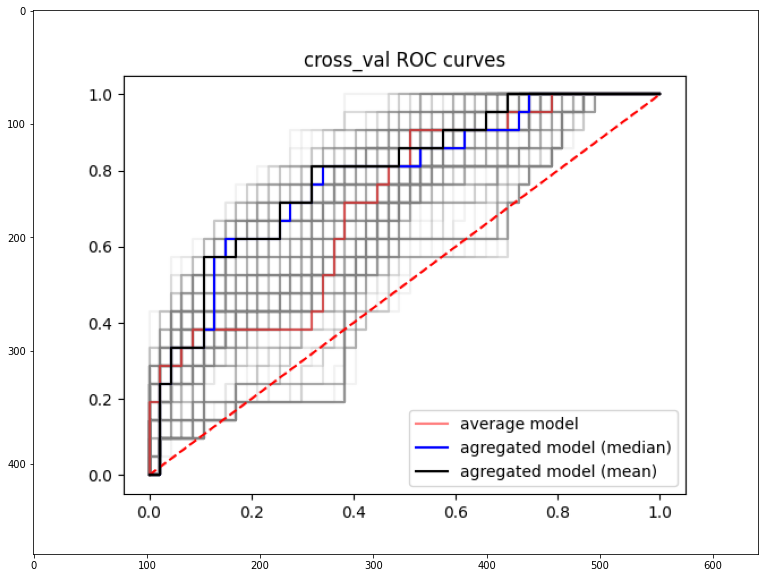

tau-0.5_drop-0.15_percentage-variable-75
AUC [0.6297953394123605, 0.09517058945375922]


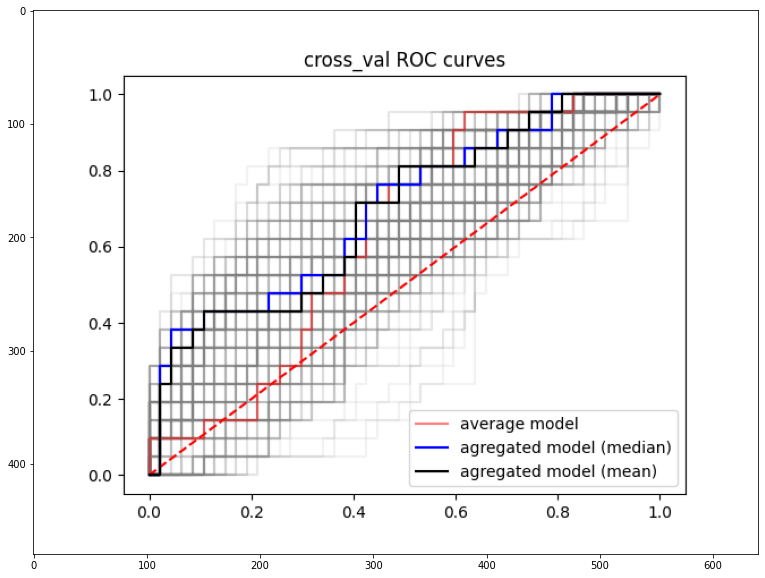

tau-0.1_drop-0.0
AUC [0.5200364741641338, 0.058089055407441643]


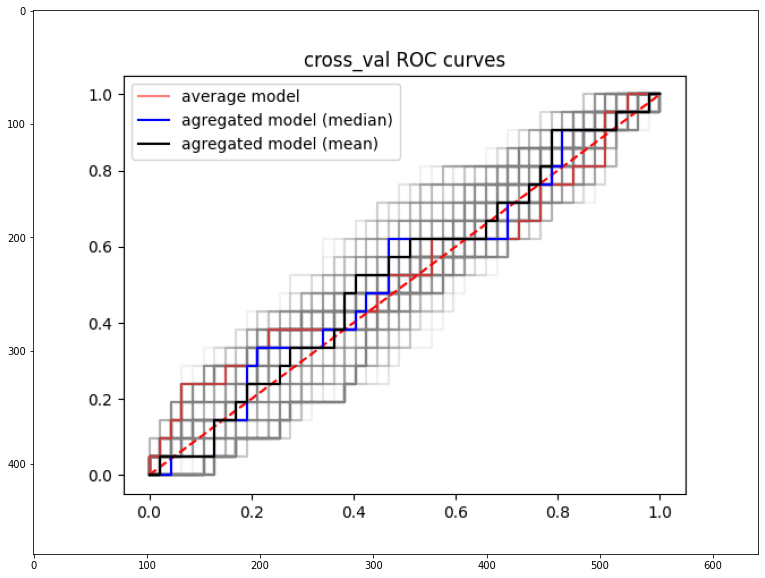

tau-0.5_drop-0.0_2
AUC [0.7111975683890578, 0.08874013727642018]


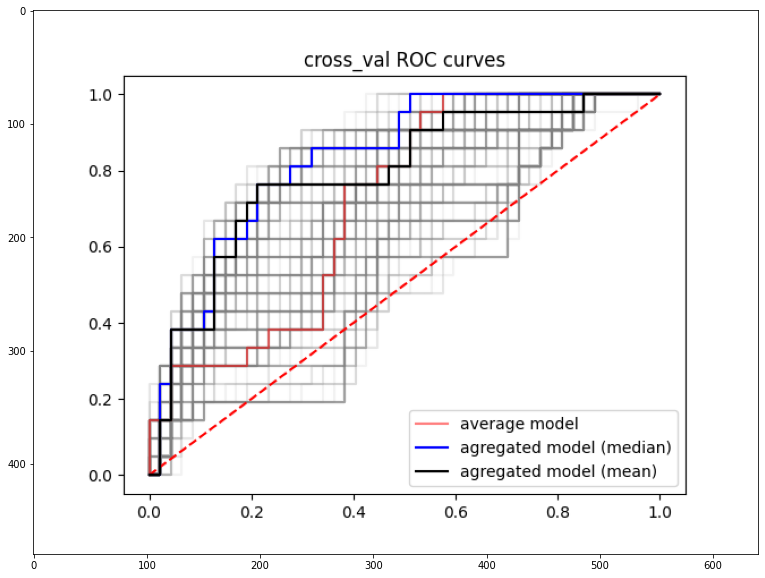

path       auc   auc_std  accuracy  \
0                           tau-0.5_drop-0.0  0.674886  0.106186  0.667412   
1                           tau-0.1_drop-0.1  0.557840  0.063828  0.569706   
2                         tau-0.5_drop-0.0_3  0.790428  0.080156  0.700176   
3                           tau-0.5_drop-0.1  0.652057  0.101454  0.638412   
4           tau-0.5_drop-0.2_drop-output-0.1  0.692361  0.078866  0.622176   
5           tau-0.5_drop-0.2_drop-output-0.0  0.725978  0.080002  0.666000   
6                         tau-0.5_drop-0.1_2  0.584134  0.118910  0.622471   
7                          tau-0.5_drop-0.15  0.595931  0.073691  0.597529   
8       tau-0.5_drop-0.0_percentage-variable  0.708827  0.081422  0.630765   
9   tau-0.5_drop-0.15_percentage-variable-75  0.629795  0.095171  0.635412   
10                          tau-0.1_drop-0.0  0.520036  0.058089  0.583471   
11                        tau-0.5_drop-0.0_2  0.711198  0.088740  0.639294   

    accuracy_std  
0       0.073088  
1       0.118658  
2       0.080350  
3       0.096749  
4       0.083910  
5       0.097739  
6       0.073206  
7       0.104534  
8       0.101988  
9       0.099459  
10      0.110319  
11      0.123502

In [14]:
excluded_conditions = []

results_df = show_results("/home/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Output/supervised/densenet",
excluded_conditions=excluded_conditions)

results_df

In [15]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

path       auc
2                         tau-0.5_drop-0.0_3  0.790428
5           tau-0.5_drop-0.2_drop-output-0.0  0.725978
11                        tau-0.5_drop-0.0_2  0.711198
8       tau-0.5_drop-0.0_percentage-variable  0.708827
4           tau-0.5_drop-0.2_drop-output-0.1  0.692361
0                           tau-0.5_drop-0.0  0.674886
3                           tau-0.5_drop-0.1  0.652057
9   tau-0.5_drop-0.15_percentage-variable-75  0.629795
7                          tau-0.5_drop-0.15  0.595931
6                         tau-0.5_drop-0.1_2  0.584134
1                           tau-0.1_drop-0.1  0.557840
10                          tau-0.1_drop-0.0  0.520036

/volatile/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Program/2022_jchavas_cingulate_inhibitory_control/contrastive/utils/config.py:123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  global_df = pd.concat([global_df, config_df], axis=0)


                                          Unnamed: 0 backbone_name  drop_rate  \
0            tau-0.5_drop-0.0_percentage-variable-75       convnet       0.00   
1          tau-0.5_drop-0.15_cutout_backbone-convnet           NaN       0.15   
2  tau-0.5_drop-0.15_percentage-variable-75_backb...           NaN       0.15   
3  tau-0.5_drop-0.15_percentage-variable-75_backb...       convnet       0.15   
4  tau-0.5_drop-0.25_percentage-variable-75_backb...           NaN       0.25   
5  tau-0.5_drop-0.2_percentage-variable-75_backbo...           NaN       0.15   
6  tau-0.5_drop-0.3_percentage-variable-75_backbo...           NaN       0.30   

   early_stopping_patience  foldlabel  max_angle      patch_size  \
0                      100       True          6             NaN   
1                      250      False         10  [1, 9, 22, 21]   
2                      250       True          6             NaN   
3                      100       True          6             NaN   
4          

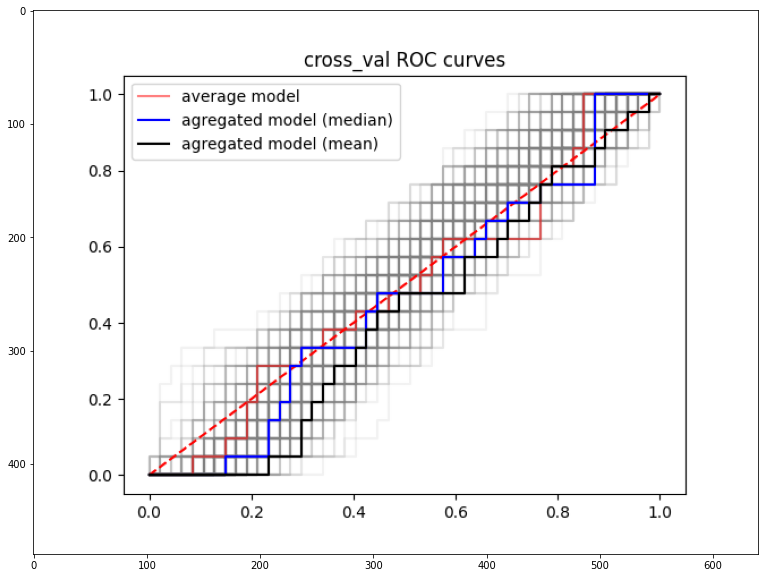

tau-0.5_drop-0.0_percentage-variable-75
AUC [0.5627720364741642, 0.09388947962022412]


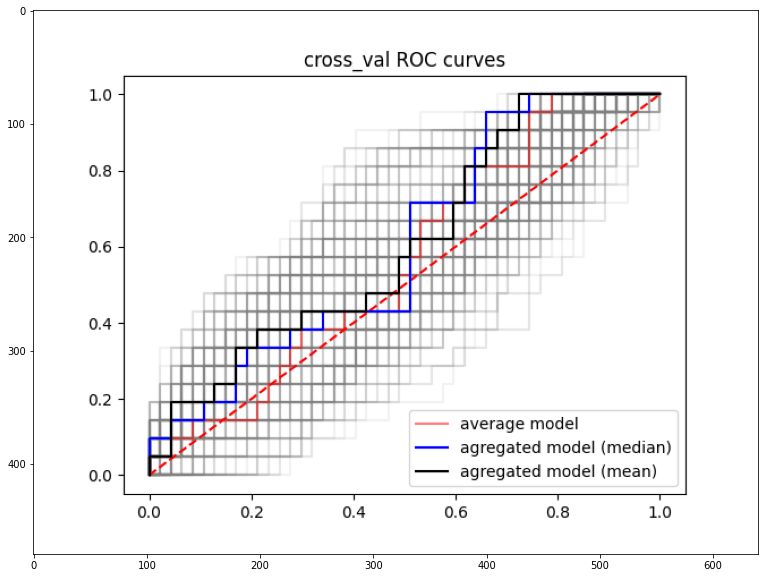

tau-0.5_drop-0.15_cutout_backbone-convnet
AUC [0.5149138804457952, 0.08362887145886067]


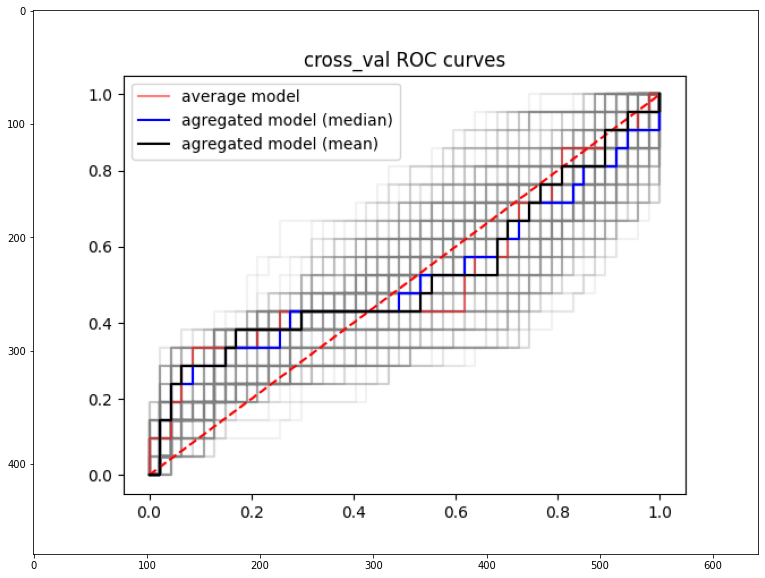

tau-0.5_drop-0.25_percentage-variable-75_backbone-convnet
AUC [0.36738804457953395, 0.10796514149720135]


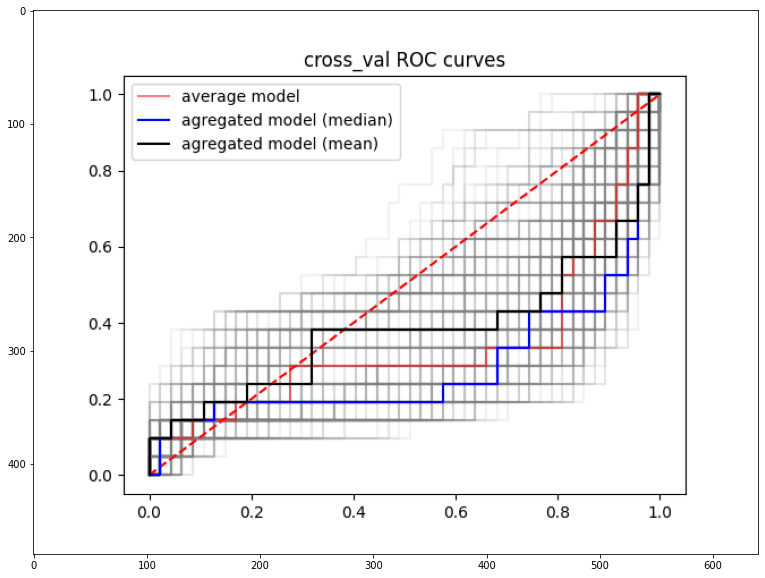

tau-0.5_drop-0.15_percentage-variable-75_backbone-convnet_2
AUC [0.481531914893617, 0.04646467770058261]


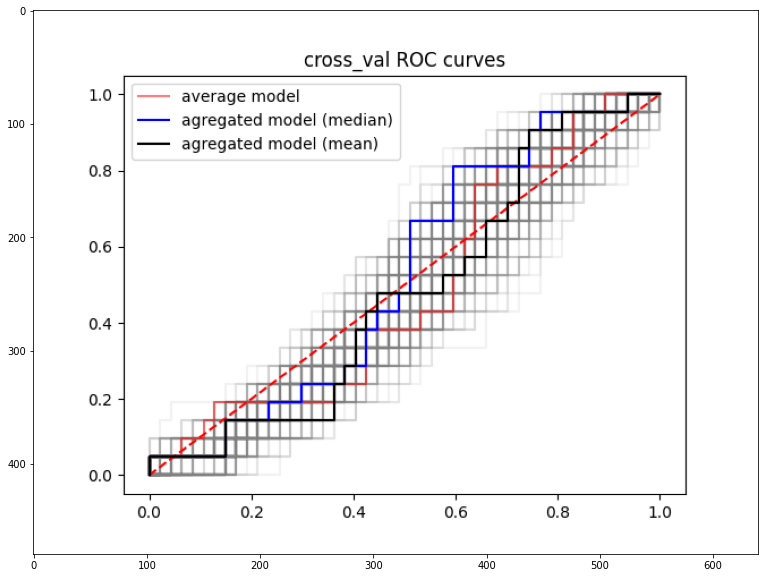

tau-0.5_drop-0.2_percentage-variable-75_backbone-convnet
AUC [0.508838905775076, 0.05888613419413187]


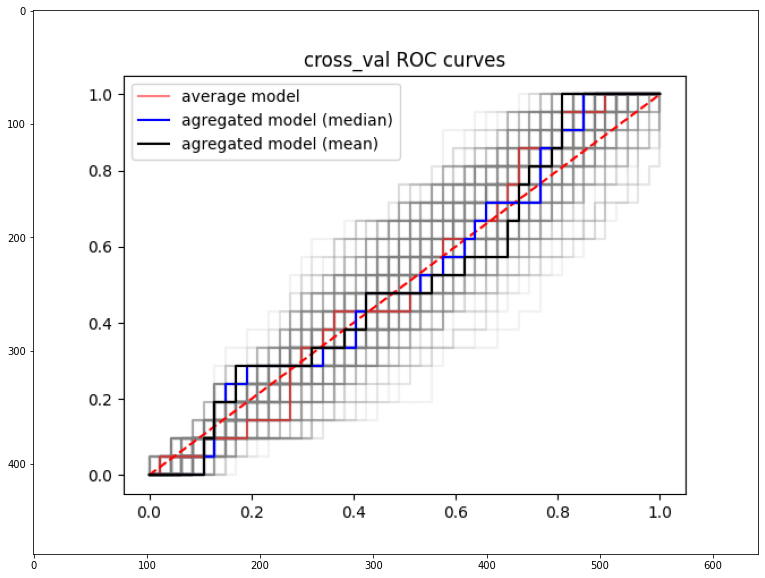

tau-0.5_drop-0.15_percentage-variable-75_backbone-convnet
AUC [0.5013171225937183, 0.061914561197816353]


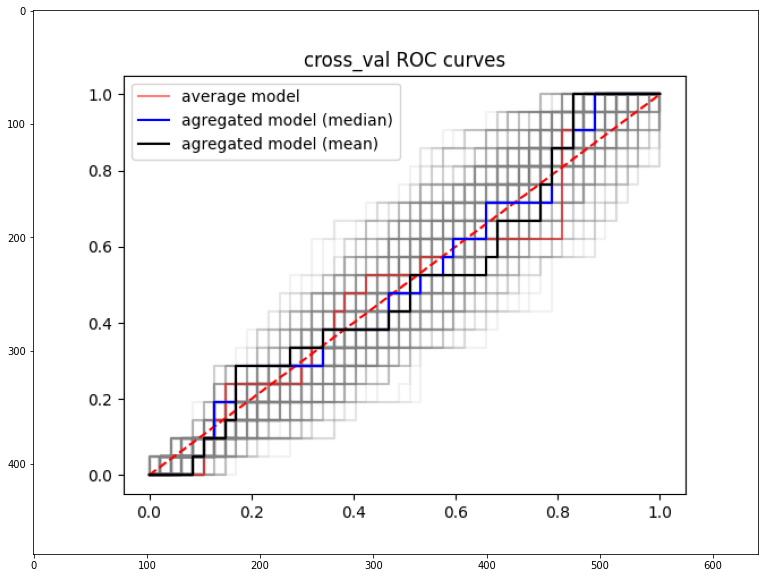

path       auc   auc_std  \
0  tau-0.5_drop-0.3_percentage-variable-75_backbo...  0.494890  0.061100   
1            tau-0.5_drop-0.0_percentage-variable-75  0.562772  0.093889   
2          tau-0.5_drop-0.15_cutout_backbone-convnet  0.514914  0.083629   
3  tau-0.5_drop-0.25_percentage-variable-75_backb...  0.367388  0.107965   
4  tau-0.5_drop-0.15_percentage-variable-75_backb...  0.481532  0.046465   
5  tau-0.5_drop-0.2_percentage-variable-75_backbo...  0.508839  0.058886   
6  tau-0.5_drop-0.15_percentage-variable-75_backb...  0.501317  0.061915   

   accuracy  accuracy_std  
0  0.684294      0.014595  
1  0.640824      0.077700  
2  0.691529      0.030021  
3  0.671471      0.029501  
4  0.613353      0.054943  
5  0.617941      0.040721  
6  0.614294      0.038348

In [19]:
excluded_conditions = []

results_df = show_results("/home/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Output/supervised/convnet",
excluded_conditions=excluded_conditions)

results_df

In [20]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

path       auc
1            tau-0.5_drop-0.0_percentage-variable-75  0.562772
2          tau-0.5_drop-0.15_cutout_backbone-convnet  0.514914
5  tau-0.5_drop-0.2_percentage-variable-75_backbo...  0.508839
6  tau-0.5_drop-0.15_percentage-variable-75_backb...  0.501317
0  tau-0.5_drop-0.3_percentage-variable-75_backbo...  0.494890
4  tau-0.5_drop-0.15_percentage-variable-75_backb...  0.481532
3  tau-0.5_drop-0.25_percentage-variable-75_backb...  0.367388

/volatile/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Program/2022_jchavas_cingulate_inhibitory_control/contrastive/utils/config.py:123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  global_df = pd.concat([global_df, config_df], axis=0)


                                           Unnamed: 0 backbone_name  \
0                            13-07_densenet_drop-0.15           NaN   
1                                   convnet_drop-0.15       convnet   
2                                  densenet_drop-0.15      densenet   
3                                densenet_drop-0.15_2      densenet   
4                                densenet_drop-0.15_3      densenet   
5                                densenet_drop-0.15_4      densenet   
6                                densenet_drop-0.15_5      densenet   
7                                   densenet_drop-0.3      densenet   
8                     densenet_no-foldlabel_drop-0.15      densenet   
9                   densenet_no-foldlabel_drop-0.15_2      densenet   
10                  densenet_no-foldlabel_drop-0.15_3      densenet   
11                  densenet_no-foldlabel_drop-0.15_4      densenet   
12                     densenet_no-foldlabel_drop-0.3      densenet   
13    

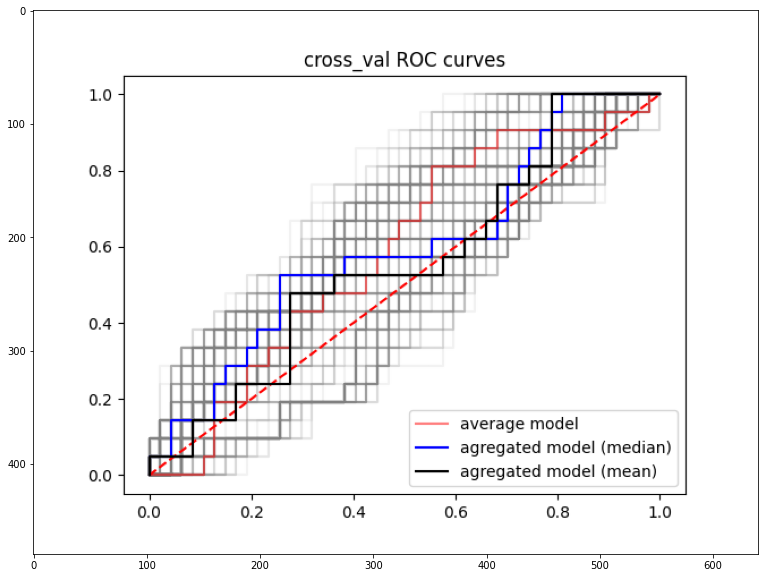

propotion-0.8_densenet_no-foldlabel_drop-0.15_4
AUC [0.5175359675785207, 0.07404241965462499]


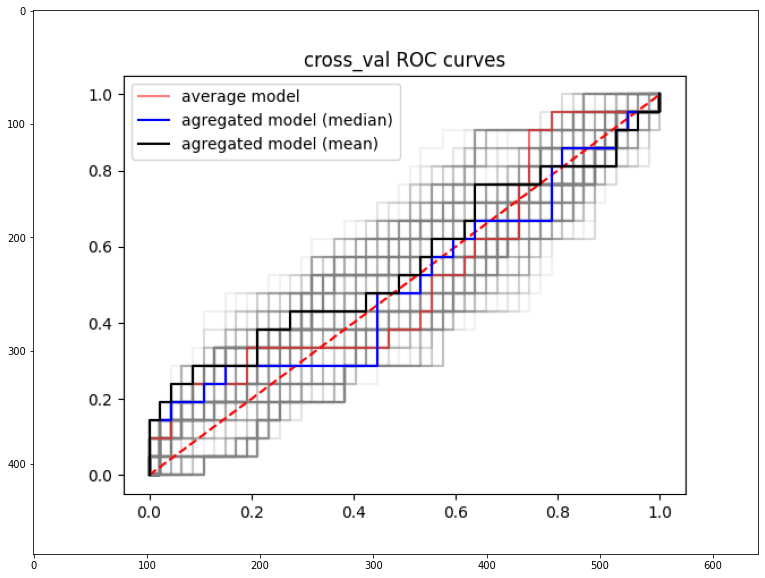

densenet_drop-0.3
AUC [0.6296737588652482, 0.09299394101308849]


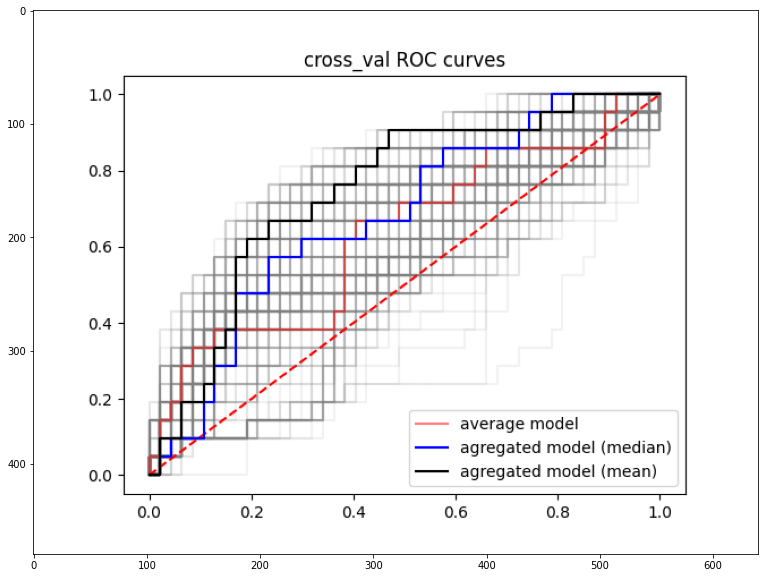

proportion-1.0_densenet_no-foldlabel_drop-0.15_tau-0.5
AUC [0.5241458966565349, 0.08539578920932872]


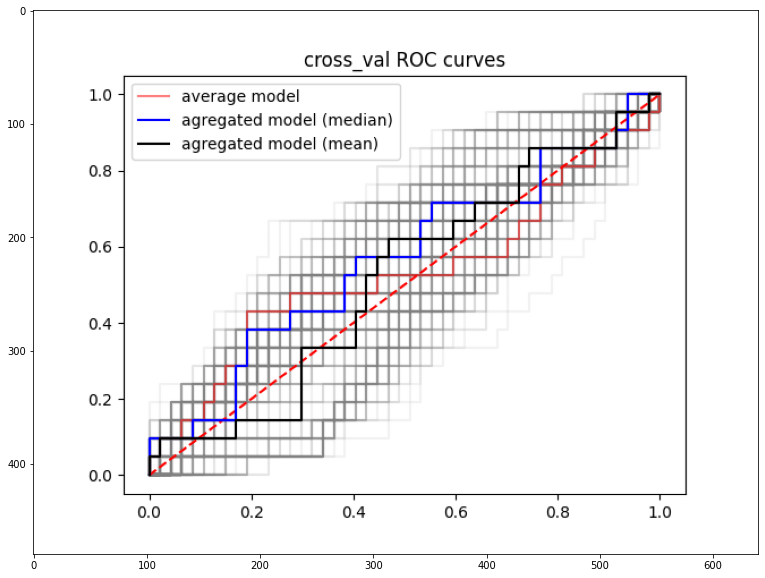

proportion-0.5_densenet_no-foldlabel_drop-0.15_2
AUC [0.5539817629179331, 0.10014652839515382]


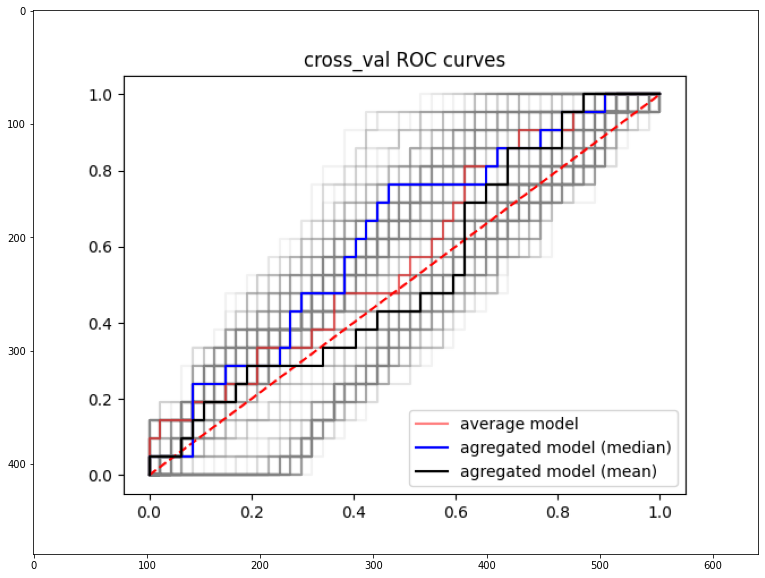

densenet_no-foldlabel_drop-0.3
AUC [0.6751286727456941, 0.07826045745497945]


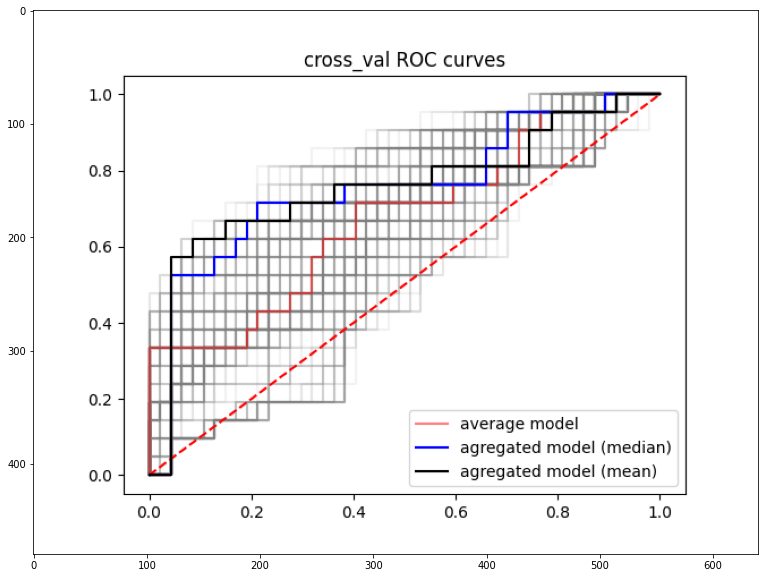

densenet_no-foldlabel_drop-0.3_2
AUC [0.6252401215805471, 0.08255948972228637]


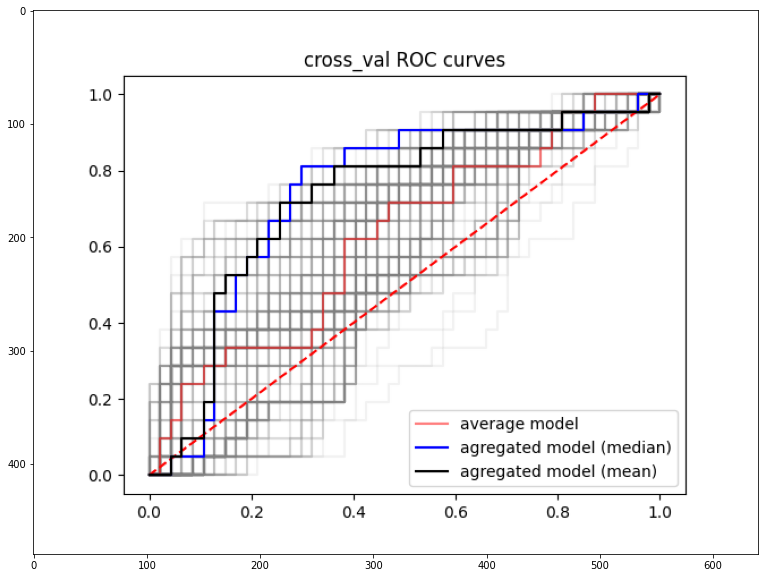

densenet_no-foldlabel_drop-0.15_2
AUC [0.6036190476190476, 0.06494052955448722]


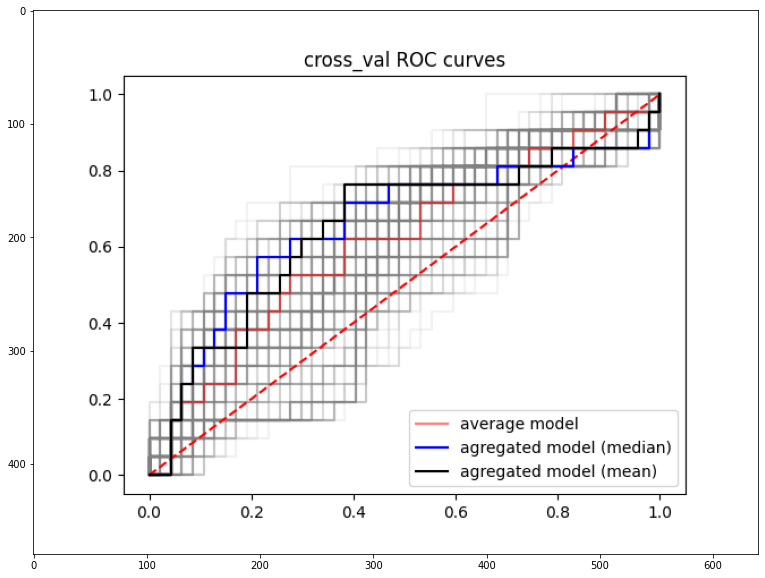

proportion-0.5_densenet_no-foldlabel_drop-0.15_3
AUC [0.5120810536980749, 0.08650125924552053]


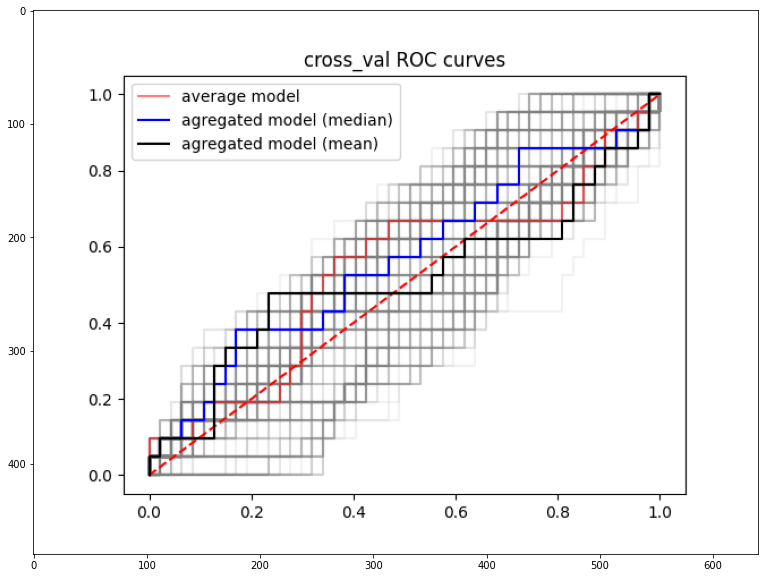

densenet_drop-0.15_4
AUC [0.5983019250253293, 0.07197670949094503]


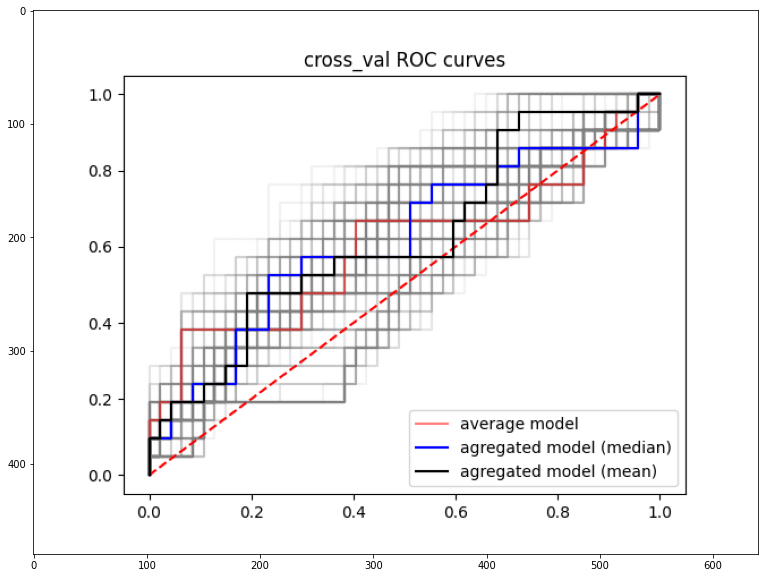

densenet_drop-0.15_5
AUC [0.6719797365754813, 0.07581614146890579]


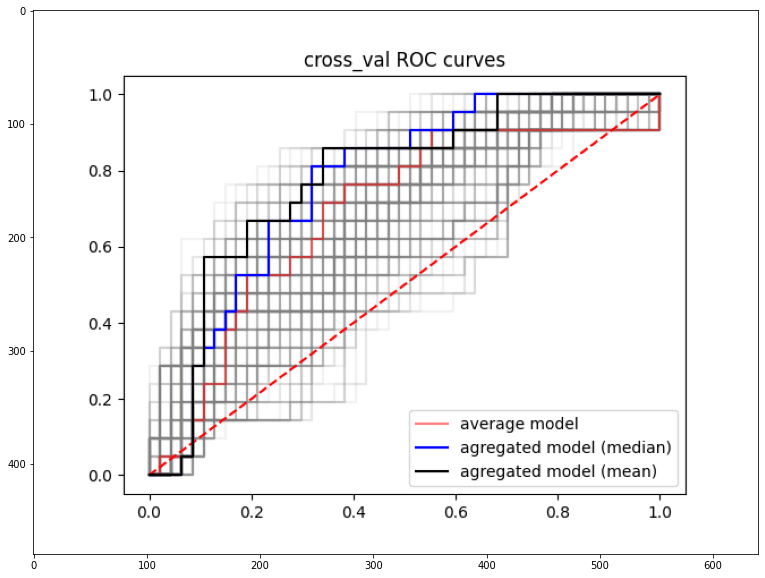

proportion-1.0_densenet_no-foldlabel_drop-0.15_3
AUC [0.4708085106382979, 0.07247503968334146]


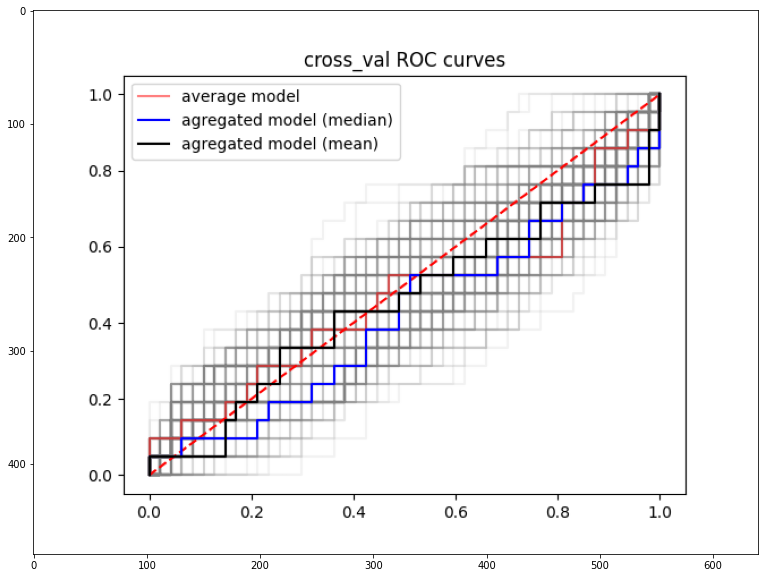

proportion-0.5_densenet_no-foldlabel_drop-0.15
AUC [0.6847537993920974, 0.07965097060451487]


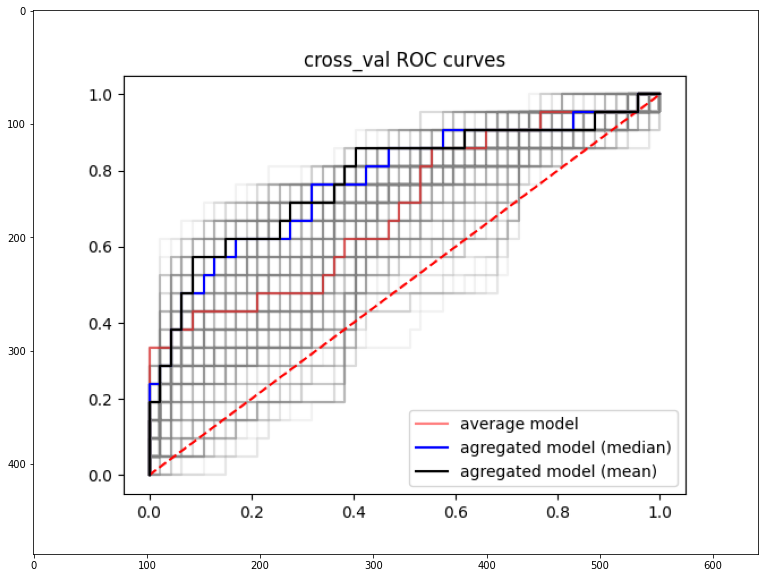

convnet_drop-0.15
AUC [0.522739614994934, 0.07912417668037601]


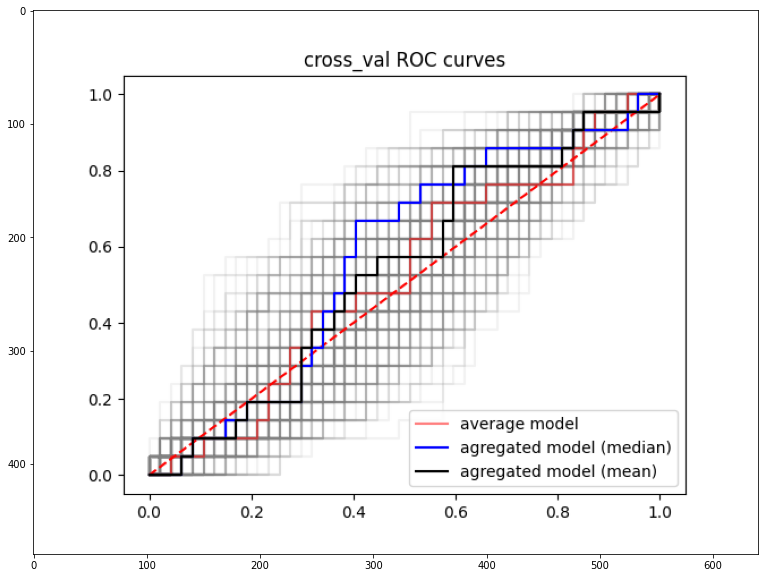

proportion-0.5_densenet_no-foldlabel_drop-0.15_5
AUC [0.6078905775075988, 0.06842982653637784]


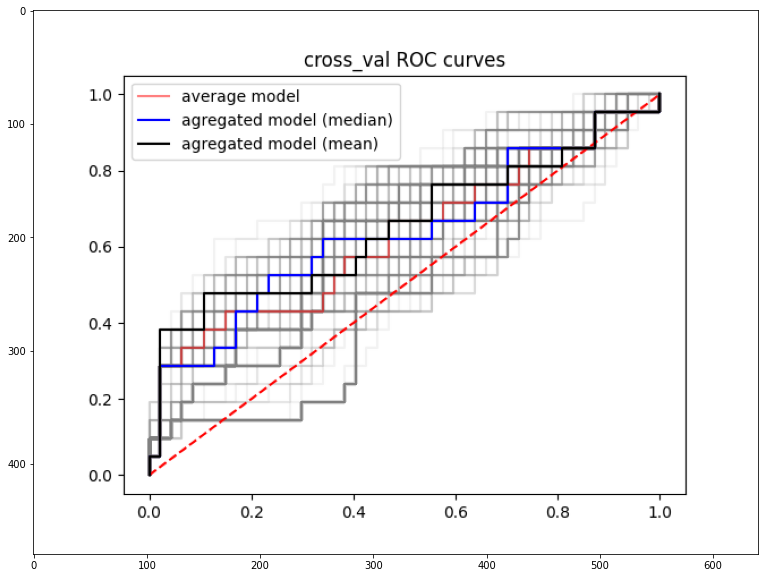

proportion-1.0_densenet_no-foldlabel_drop-0.15_4
AUC [0.5612401215805471, 0.08860603133330903]


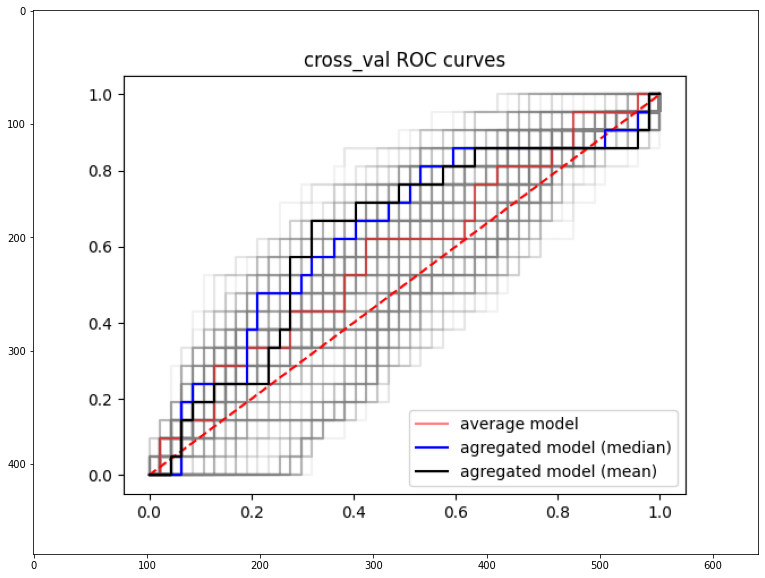

13-07_densenet_drop-0.15
AUC [0.5601702127659575, 0.07351934745873033]


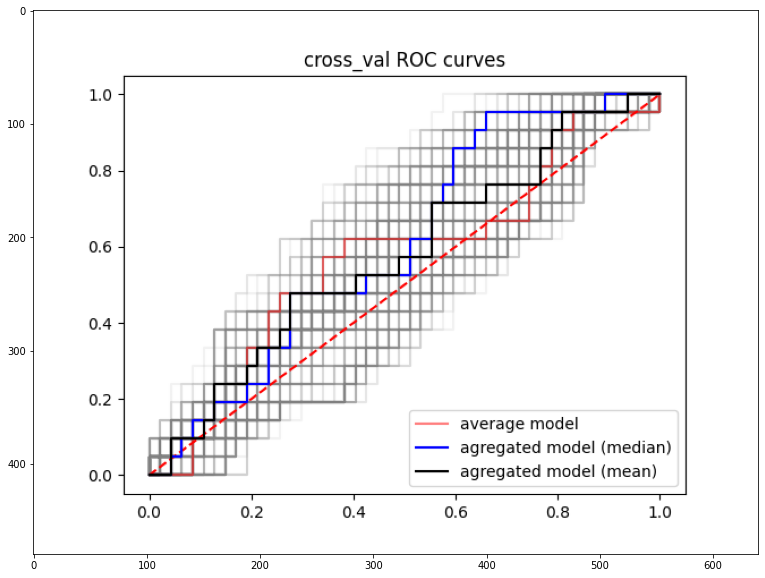

propotion-0.8_densenet_no-foldlabel_drop-0.15_2
AUC [0.3699007092198582, 0.0911053320337045]


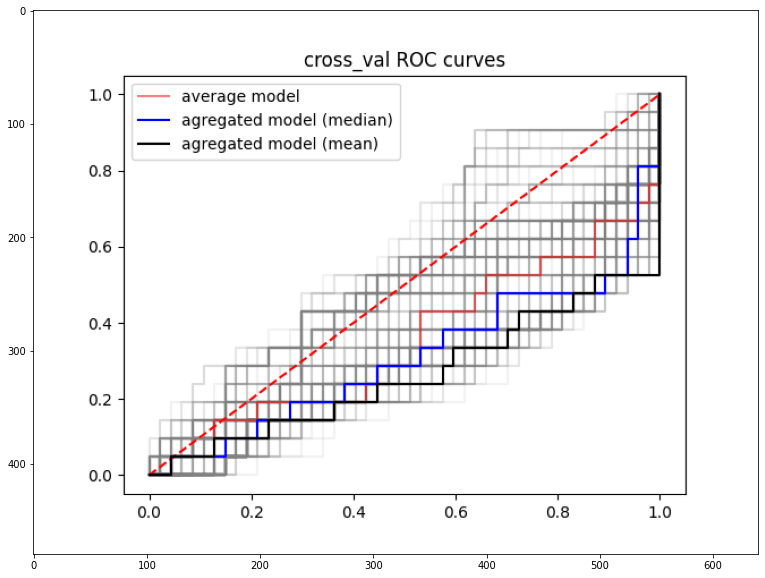

proportion-1.0_densenet_drop-0.15
AUC [0.5143181357649442, 0.07100212996692515]


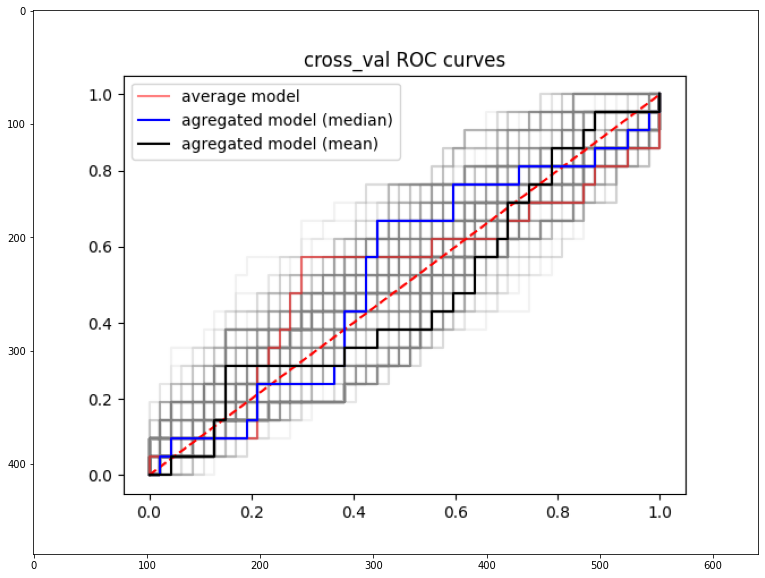

densenet_no-foldlabel_drop-0.15_4
AUC [0.6550030395136778, 0.08175573537614436]


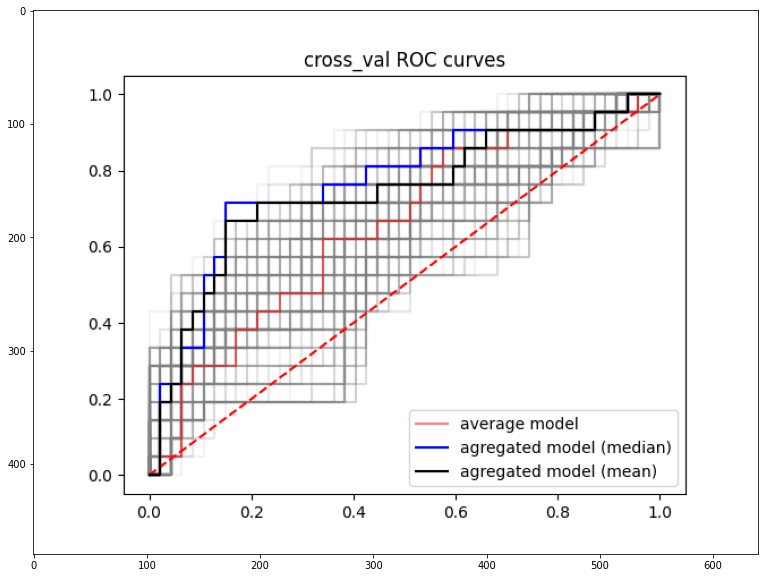

proportion-1.0_densenet_drop-0.15_tau-0.5
AUC [0.6057669706180345, 0.06685874111457338]


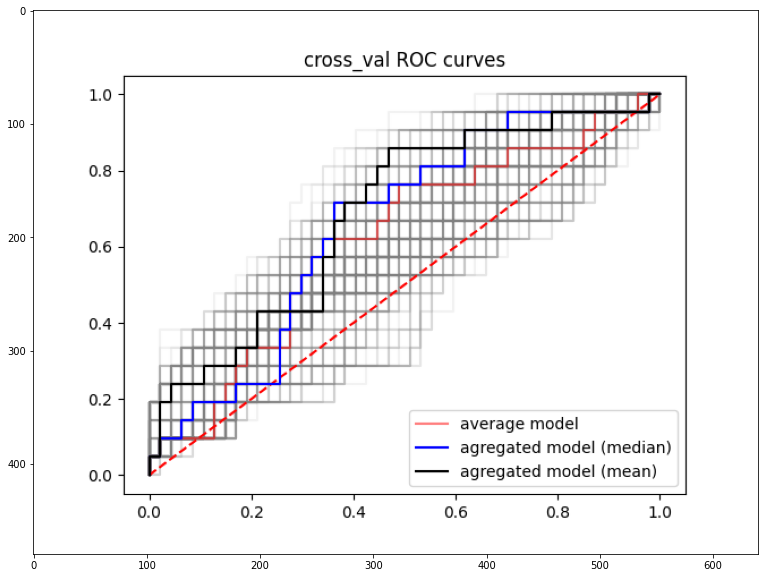

densenet_no-foldlabel_drop-0.15
AUC [0.3973819655521783, 0.08207843454851384]


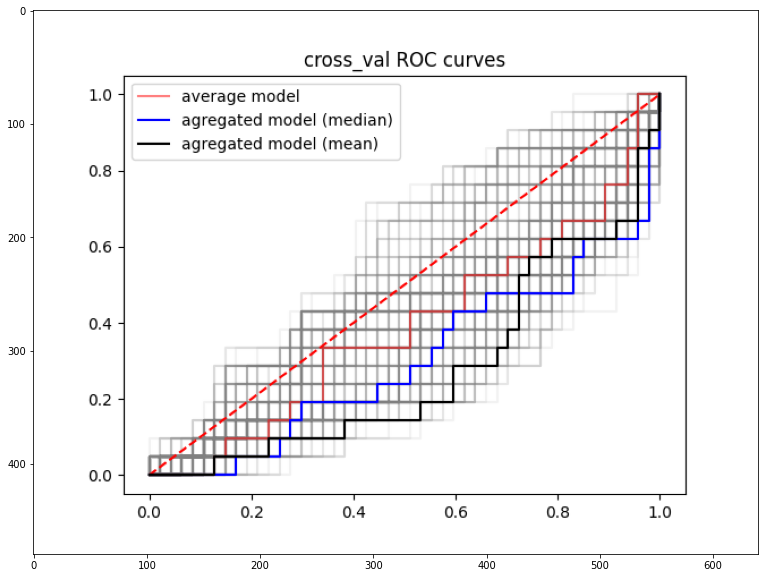

densenet_drop-0.15
AUC [0.6482066869300912, 0.08264151197394135]


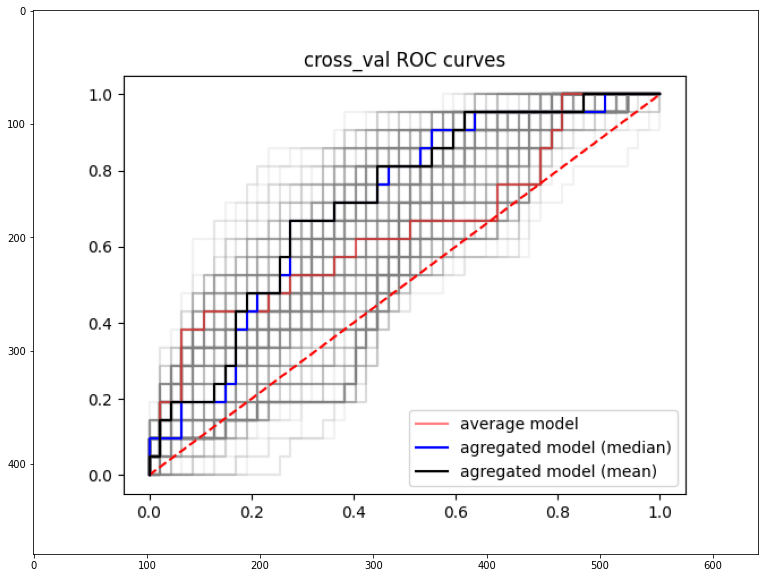

proportion-1.0_densenet_no-foldlabel_drop-0.15
AUC [0.509580547112462, 0.08766212529914627]


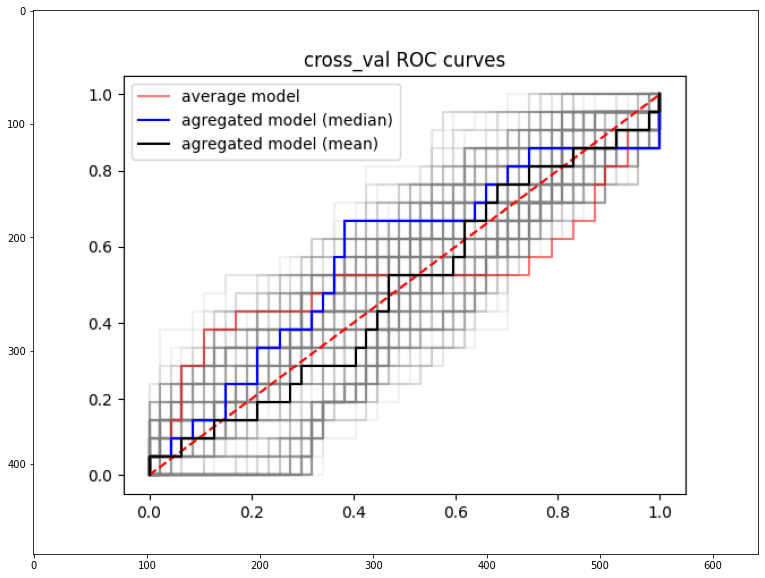

densenet_drop-0.15_2
AUC [0.6921540020263424, 0.07235498069880071]


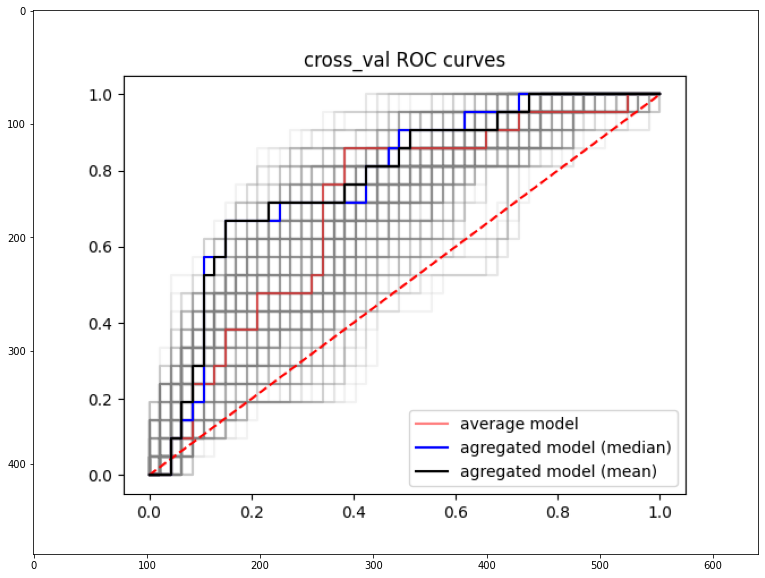

proportion-1.0_densenet_no-foldlabel_drop-0.15_2
AUC [0.4524255319148936, 0.06683521331898548]


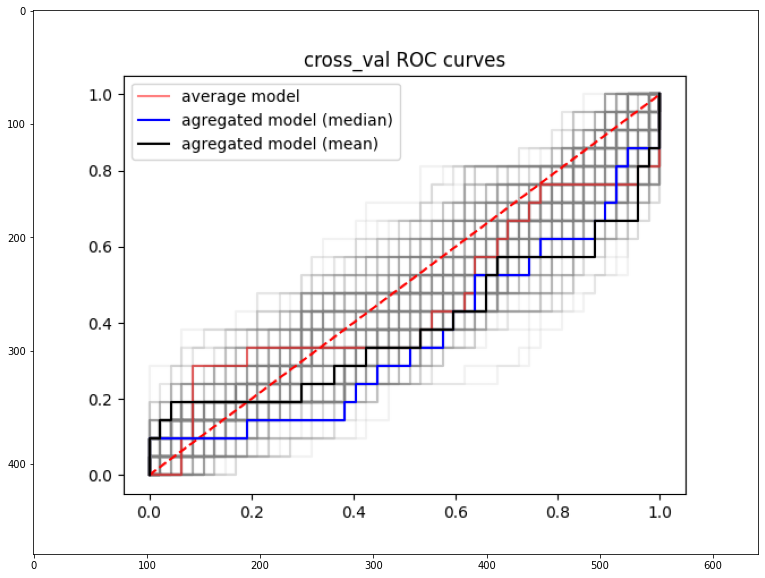

densenet_no-foldlabel_drop-0.3_4
AUC [0.5569604863221884, 0.055383405310904854]


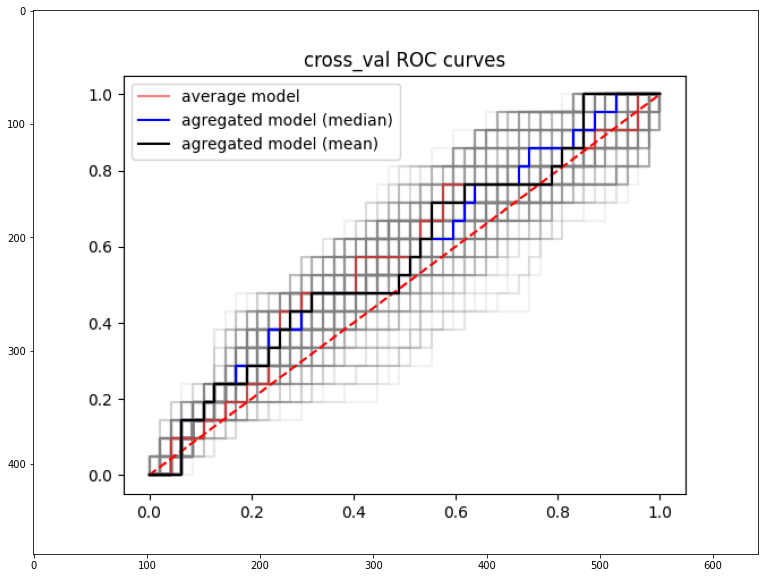

densenet_drop-0.15_3
AUC [0.7264599797365754, 0.083245835902949]


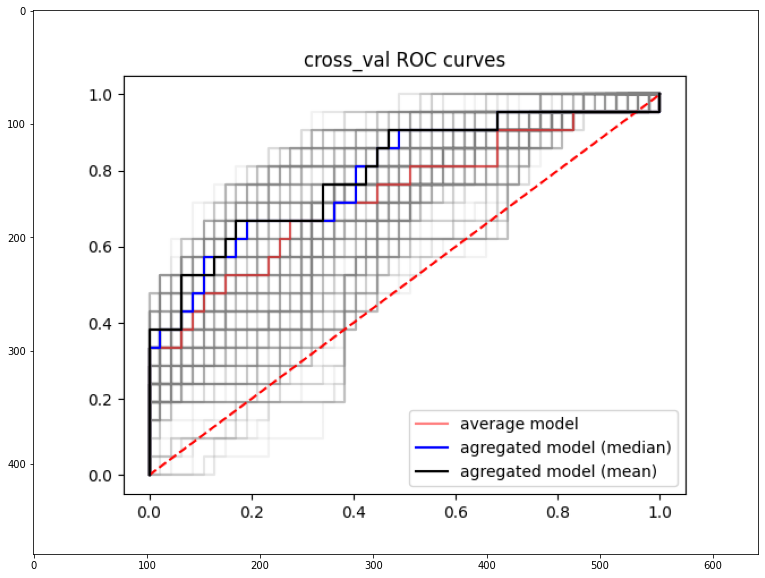

propotion-0.8_densenet_no-foldlabel_drop-0.15_3
AUC [0.5176575481256331, 0.08415775416487732]


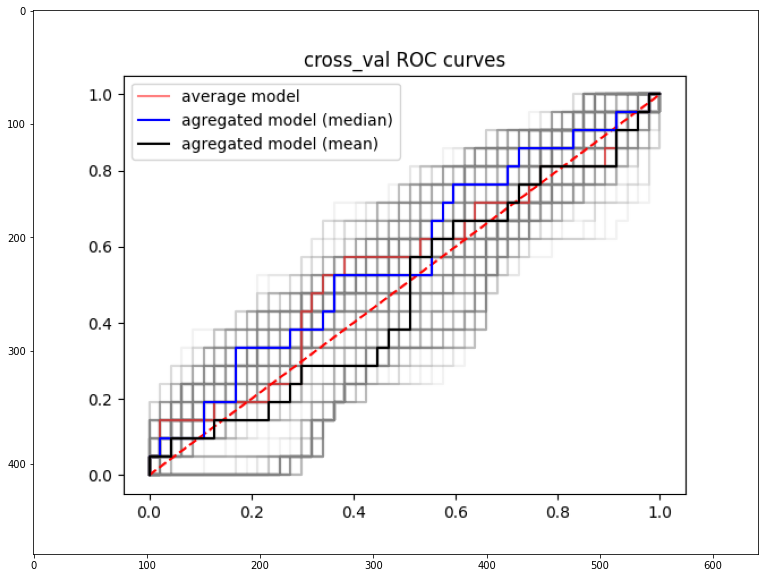

proportion-0.5_densenet_drop-0.15
AUC [0.5252603850050658, 0.07159808993345863]


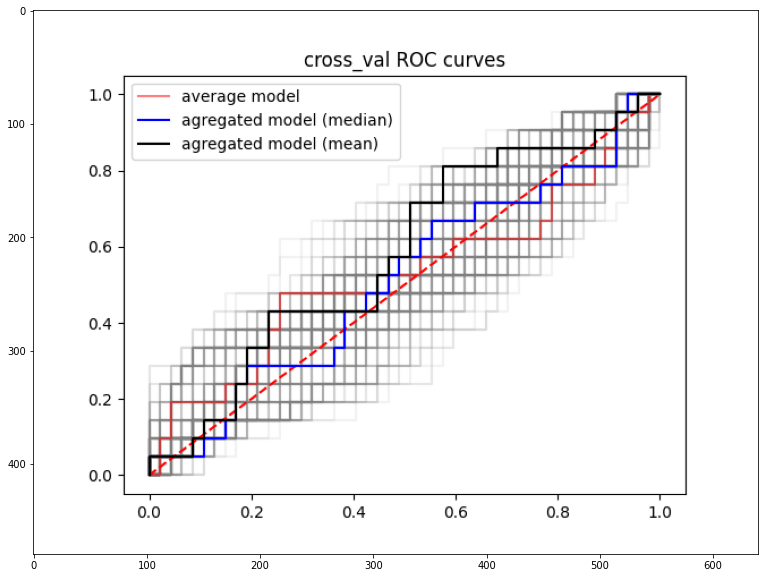

densenet_no-foldlabel_drop-0.3_3
AUC [0.7425653495440729, 0.07858364156795006]


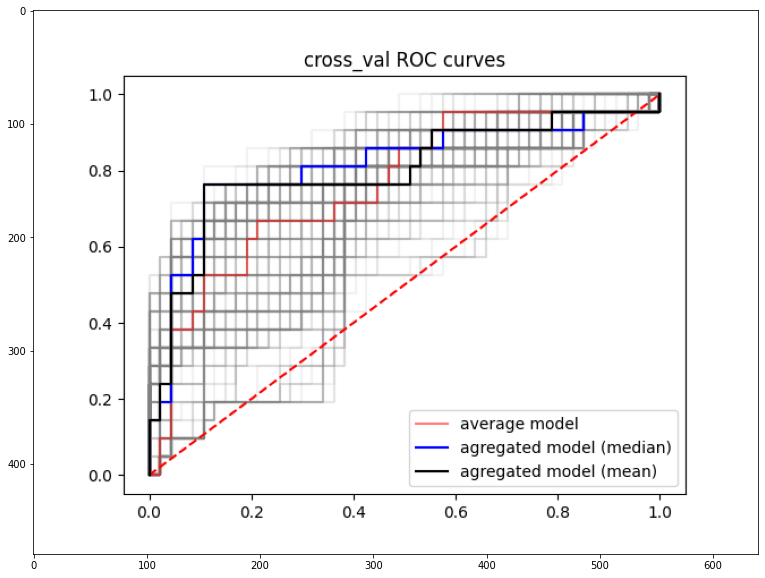

proportion-0.5_densenet_no-foldlabel_drop-0.15_4
AUC [0.5962472137791286, 0.06170365807815492]


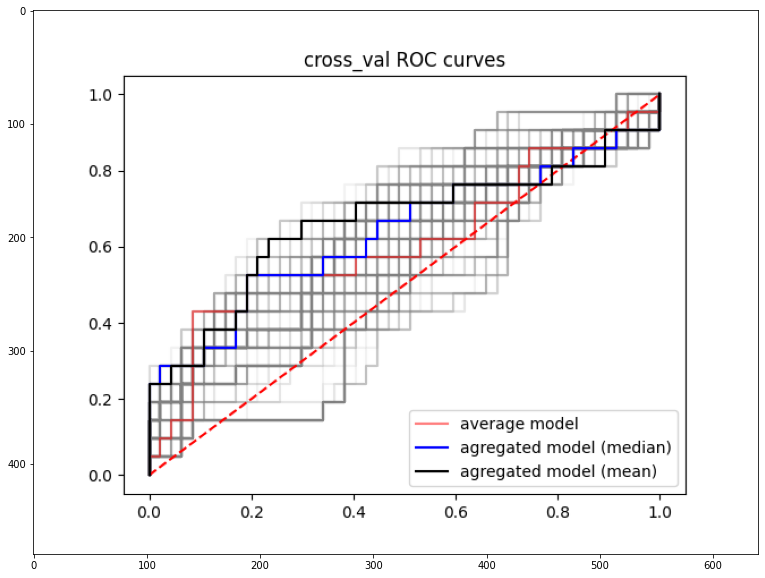

densenet_no-foldlabel_drop-0.15_3
AUC [0.5512948328267476, 0.06633292923817331]


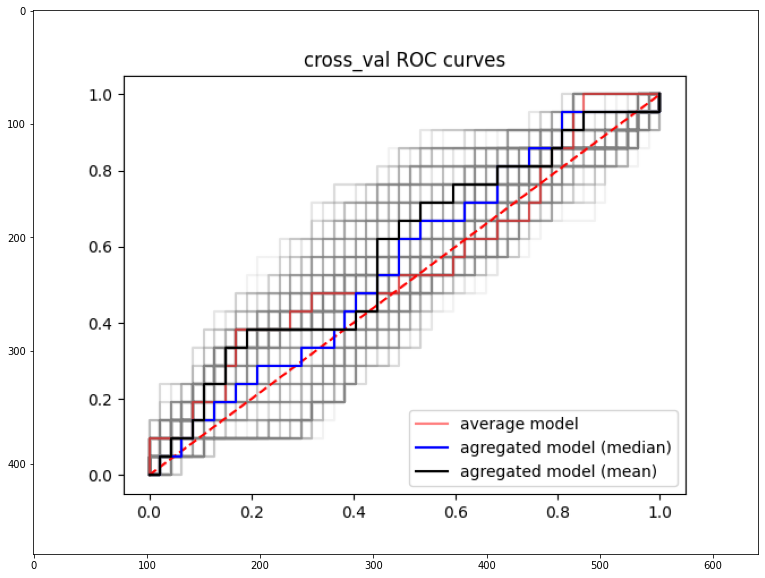

propotion-0.8_densenet_no-foldlabel_drop-0.15
AUC [0.4796757852077001, 0.07848172641091744]


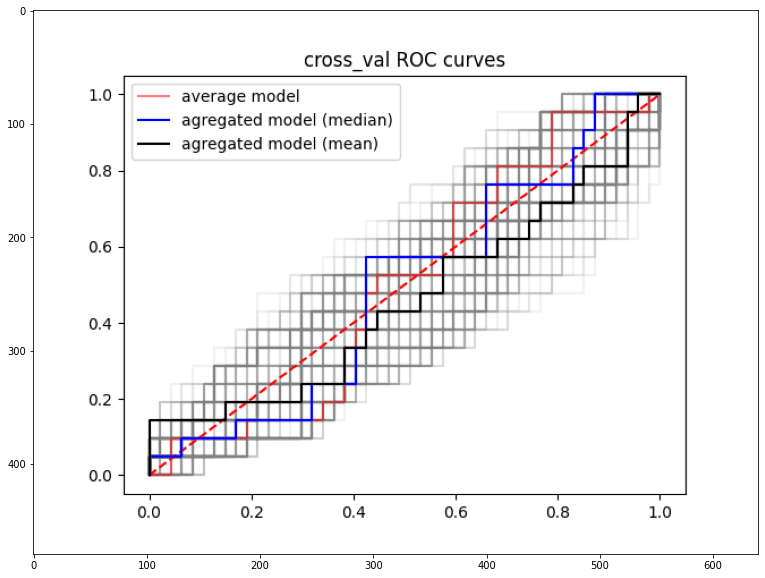

path       auc   auc_std  \
0    proportion-1.0_densenet_no-foldlabel_drop-0.15_5  0.570116  0.085932   
1     propotion-0.8_densenet_no-foldlabel_drop-0.15_4  0.517536  0.074042   
2                                   densenet_drop-0.3  0.629674  0.092994   
3   proportion-1.0_densenet_no-foldlabel_drop-0.15...  0.524146  0.085396   
4    proportion-0.5_densenet_no-foldlabel_drop-0.15_2  0.553982  0.100147   
5                      densenet_no-foldlabel_drop-0.3  0.675129  0.078260   
6                    densenet_no-foldlabel_drop-0.3_2  0.625240  0.082559   
7                   densenet_no-foldlabel_drop-0.15_2  0.603619  0.064941   
8    proportion-0.5_densenet_no-foldlabel_drop-0.15_3  0.512081  0.086501   
9                                densenet_drop-0.15_4  0.598302  0.071977   
10                               densenet_drop-0.15_5  0.671980  0.075816   
11   proportion-1.0_densenet_no-foldlabel_drop-0.15_3  0.470809  0.072475   
12     proportion-0.5_densenet_no-foldlabel_drop-0.15  0.684754  0.079651   
13                                  convnet_drop-0.15  0.522740  0.079124   
14   proportion-0.5_densenet_no-foldlabel_drop-0.15_5  0.607891  0.068430   
15   proportion-1.0_densenet_no-foldlabel_drop-0.15_4  0.561240  0.088606   
16                           13-07_densenet_drop-0.15  0.560170  0.073519   
17    propotion-0.8_densenet_no-foldlabel_drop-0.15_2  0.369901  0.091105   
18                  proportion-1.0_densenet_drop-0.15  0.514318  0.071002   
19                  densenet_no-foldlabel_drop-0.15_4  0.655003  0.081756   
20          proportion-1.0_densenet_drop-0.15_tau-0.5  0.605767  0.066859   
21                    densenet_no-foldlabel_drop-0.15  0.397382  0.082078   
22                                 densenet_drop-0.15  0.648207  0.082642   
23     proportion-1.0_densenet_no-foldlabel_drop-0.15  0.509581  0.087662   
24                               densenet_drop-0.15_2  0.692154  0.072355   
25   proportion-1.0_densenet_no-foldlabel_drop-0.15_2  0.452426  0.066835   
26                   densenet_no-foldlabel_drop-0.3_4  0.556960  0.055383   
27                               densenet_drop-0.15_3  0.726460  0.083246   
28    propotion-0.8_densenet_no-foldlabel_drop-0.15_3  0.517658  0.084158   
29                  proportion-0.5_densenet_drop-0.15  0.525260  0.071598   
30                   densenet_no-foldlabel_drop-0.3_3  0.742565  0.078584   
31   proportion-0.5_densenet_no-foldlabel_drop-0.15_4  0.596247  0.061704   
32                  densenet_no-foldlabel_drop-0.15_3  0.551295  0.066333   
33      propotion-0.8_densenet_no-foldlabel_drop-0.15  0.479676  0.078482   

    accuracy  accuracy_std  
0   0.581647      0.112842  
1   0.569235      0.118328  
2   0.654706      0.069765  
3   0.555647      0.120374  
4   0.584647      0.099402  
5   0.656882      0.086480  
6   0.593529      0.106816  
7   0.588647      0.106610  
8   0.568235      0.108352  
9   0.622941      0.103149  
10  0.618882      0.091618  
11  0.571353      0.114311  
12  0.636353      0.115088  
13  0.595412      0.070787  
14  0.570647      0.113491  
15  0.571235      0.103965  
16  0.570706      0.112270  
17  0.566471      0.112445  
18  0.549941      0.117903  
19  0.624647      0.105220  
20  0.603118      0.081280  
21  0.567176      0.105700  
22  0.603588      0.102531  
23  0.567765      0.111600  
24  0.623647      0.095542  
25  0.570176      0.115600  
26  0.671706      0.014491  
27  0.659471      0.120016  
28  0.570647      0.115290  
29  0.591824      0.079804  
30  0.703529      0.091497  
31  0.576647      0.118941  
32  0.590706      0.102533  
33  0.566941      0.113141

In [7]:
excluded_conditions = []

results_df = show_results("/home/jc225751/Runs/43_supervised_contrastive_ACCpatterns/Output/supervised/drop_output_0",
excluded_conditions=excluded_conditions)

results_df

In [8]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

path       auc
30                   densenet_no-foldlabel_drop-0.3_3  0.742565
27                               densenet_drop-0.15_3  0.726460
24                               densenet_drop-0.15_2  0.692154
12     proportion-0.5_densenet_no-foldlabel_drop-0.15  0.684754
5                      densenet_no-foldlabel_drop-0.3  0.675129
10                               densenet_drop-0.15_5  0.671980
19                  densenet_no-foldlabel_drop-0.15_4  0.655003
22                                 densenet_drop-0.15  0.648207
2                                   densenet_drop-0.3  0.629674
6                    densenet_no-foldlabel_drop-0.3_2  0.625240
14   proportion-0.5_densenet_no-foldlabel_drop-0.15_5  0.607891
20          proportion-1.0_densenet_drop-0.15_tau-0.5  0.605767
7                   densenet_no-foldlabel_drop-0.15_2  0.603619
9                                densenet_drop-0.15_4  0.598302
31   proportion-0.5_densenet_no-foldlabel_drop-0.15_4  0.596247
0    proportion-1.0_densenet_no-foldlabel_drop-0.15_5  0.570116
15   proportion-1.0_densenet_no-foldlabel_drop-0.15_4  0.561240
16                           13-07_densenet_drop-0.15  0.560170
26                   densenet_no-foldlabel_drop-0.3_4  0.556960
4    proportion-0.5_densenet_no-foldlabel_drop-0.15_2  0.553982
32                  densenet_no-foldlabel_drop-0.15_3  0.551295
29                  proportion-0.5_densenet_drop-0.15  0.525260
3   proportion-1.0_densenet_no-foldlabel_drop-0.15...  0.524146
13                                  convnet_drop-0.15  0.522740
28    propotion-0.8_densenet_no-foldlabel_drop-0.15_3  0.517658
1     propotion-0.8_densenet_no-foldlabel_drop-0.15_4  0.517536
18                  proportion-1.0_densenet_drop-0.15  0.514318
8    proportion-0.5_densenet_no-foldlabel_drop-0.15_3  0.512081
23     proportion-1.0_densenet_no-foldlabel_drop-0.15  0.509581
33      propotion-0.8_densenet_no-foldlabel_drop-0.15  0.479676
11   proportion-1.0_densenet_no-foldlabel_drop-0.15_3  0.470809
25   proportion-1.0_densenet_no-foldlabel_drop-0.15_2  0.452426
21                    densenet_no-foldlabel_drop-0.15  0.397382
17    propotion-0.8_densenet_no-foldlabel_drop-0.15_2  0.369901

       Unnamed: 0  batch_size  drop_rate  foldlabel       input_size  \
0     1mm_fold_30          16       0.15       True  (1, 22, 46, 38)   
1      1mm_fold_4          16       0.15       True  (1, 22, 46, 38)   
2       1mm_no_30          16       0.15      False  (1, 22, 46, 38)   
3        1mm_no_4          16       0.15      False  (1, 22, 46, 38)   
4     1mm_no_4(2)          16       0.15      False  (1, 22, 46, 38)   
5          T_0.01          16       0.15      False  (1, 17, 40, 38)   
6           T_0.5          16       0.15      False  (1, 17, 40, 38)   
7             T_1          16       0.15      False  (1, 17, 40, 38)   
8           base1          16       0.15      False  (1, 17, 40, 38)   
9           base2          16       0.15      False  (1, 17, 40, 38)   
10          base3          16       0.15      False  (1, 17, 40, 38)   
11   batch_size_4           4       0.15      False  (1, 17, 40, 38)   
12  batch_size_64          64       0.15      False  (1, 17, 40,

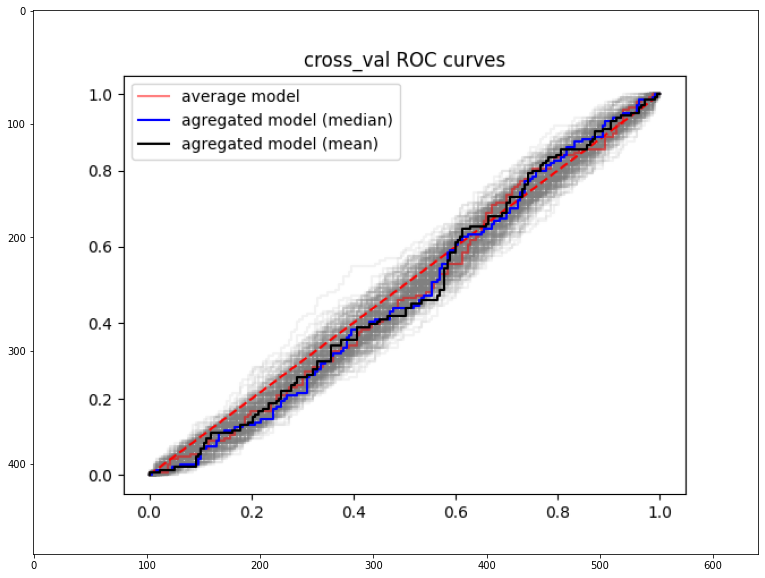

1mm_fold_4
AUC [0.5745745910885505, 0.0635512417688935]


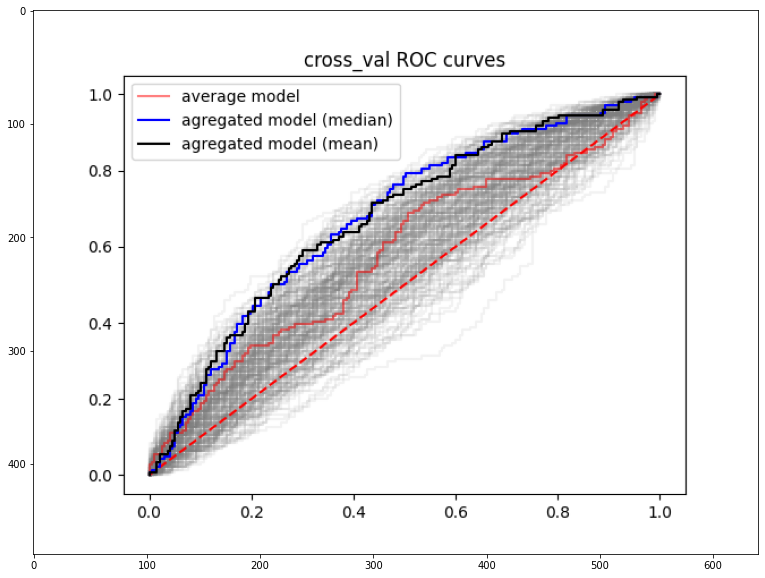

drop_rate_0.6
AUC [0.5306190073322052, 0.04491732965441525]


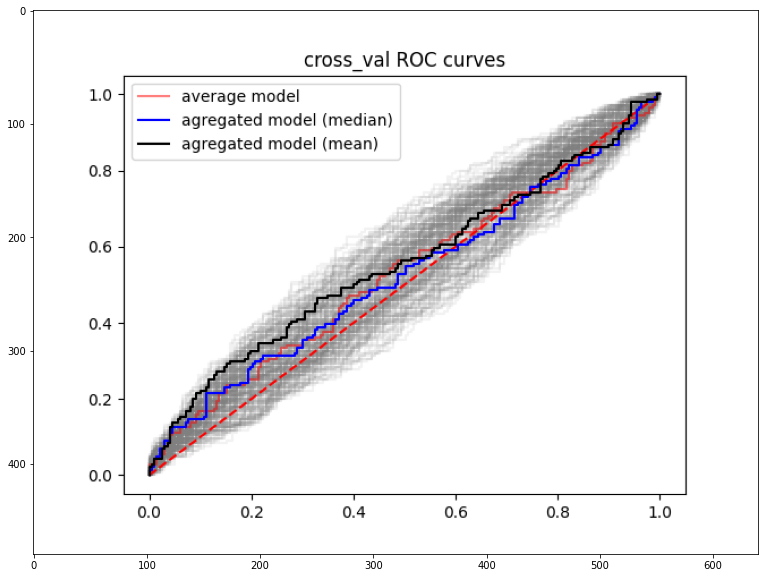

T_1
AUC [0.6556744218838128, 0.03923542967873721]


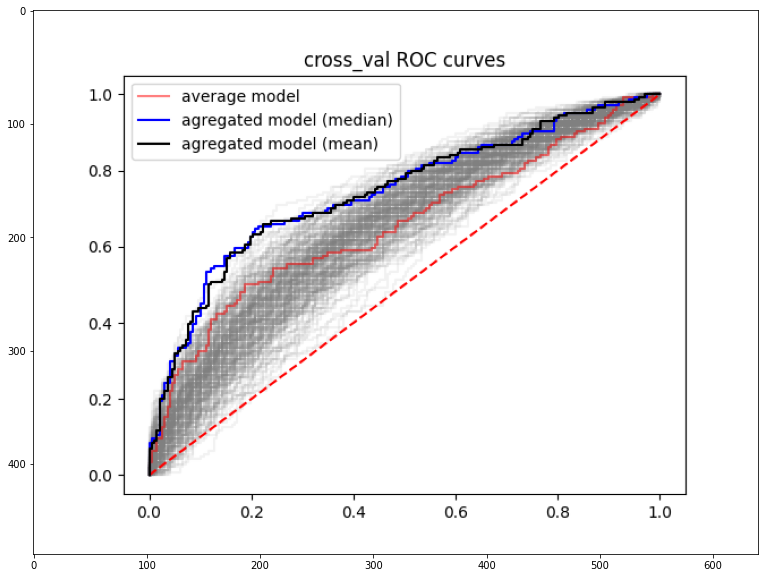

drop_rate_0.3
AUC [0.6098822617033277, 0.047838708739584776]


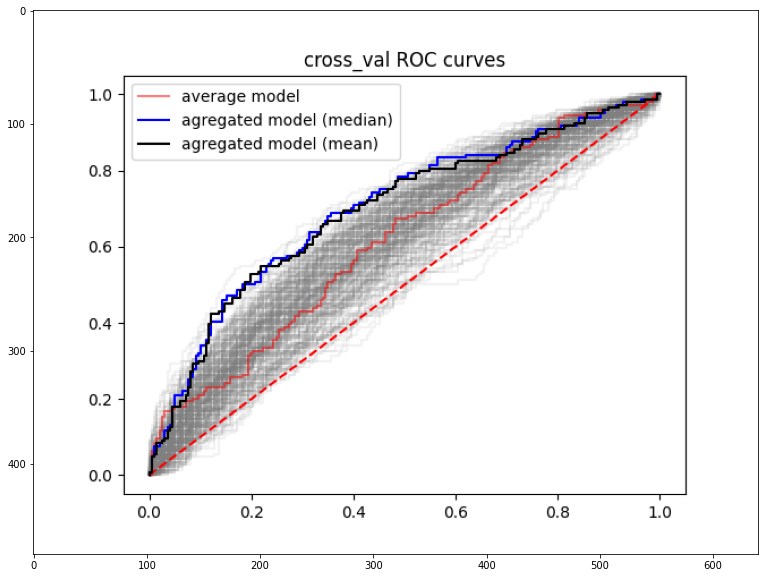

T_0.5
AUC [0.6242667794698252, 0.045173011362606555]


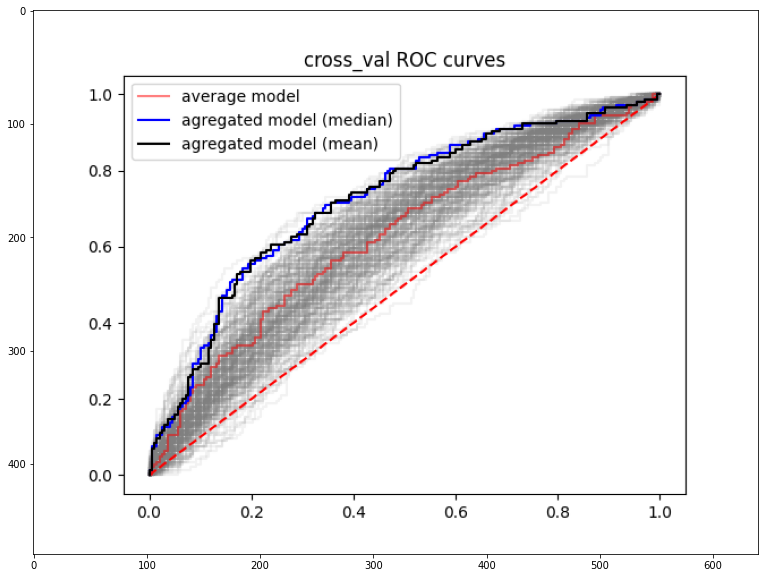

batch_size_64
AUC [0.6366903553299493, 0.04478391910327635]


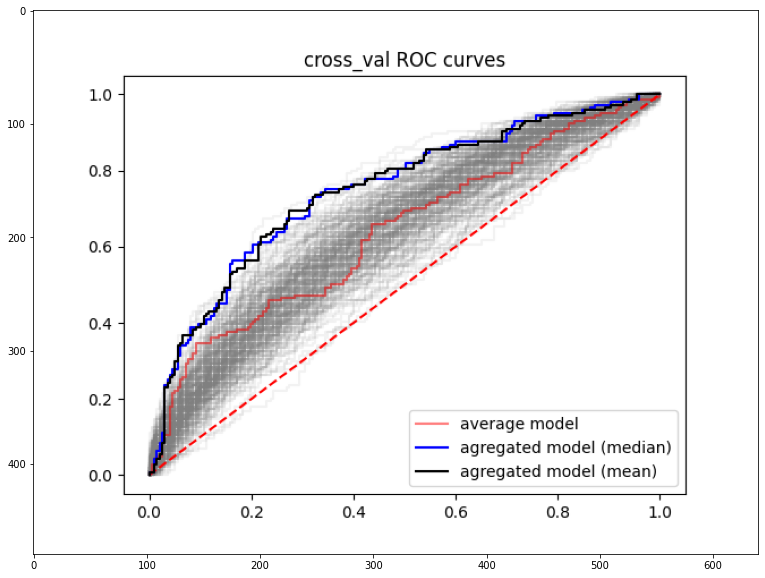

joel_30
AUC [0.6504619289340101, 0.04382319007476567]


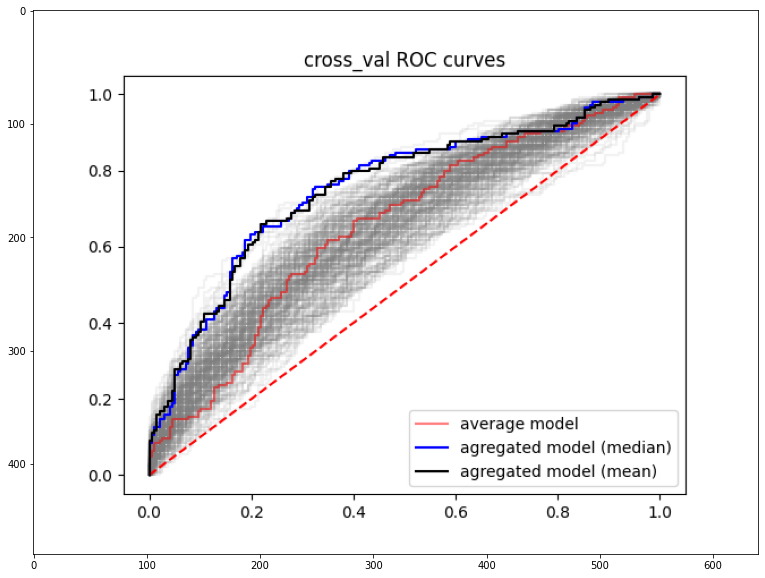

1mm_no_4(2)
AUC [0.569887760857304, 0.046849207946765725]


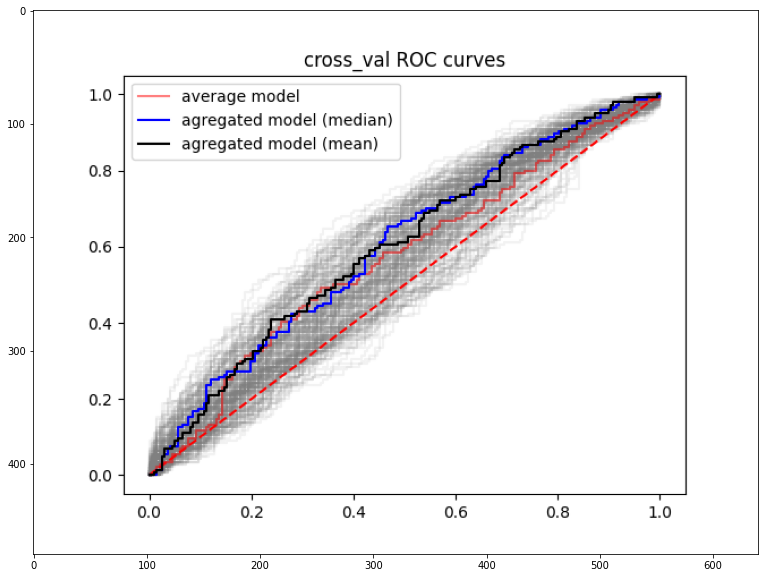

batch_size_4
AUC [0.6176228144388042, 0.044589424149593174]


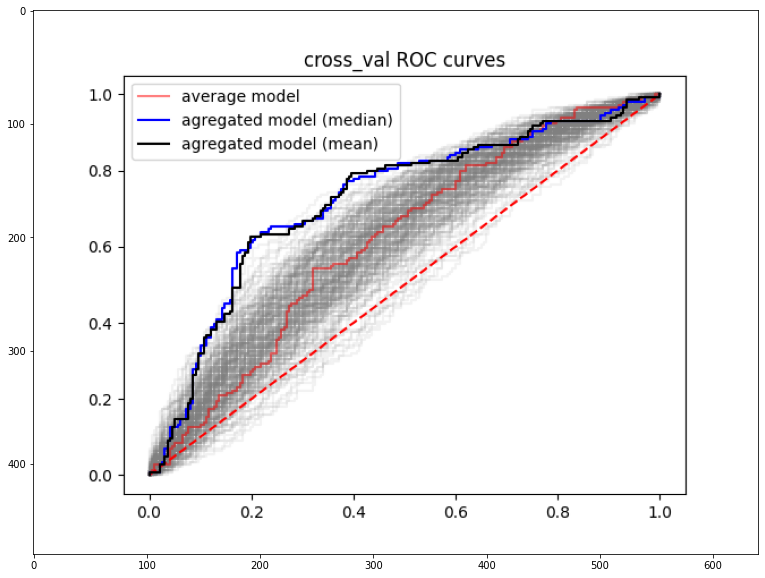

T_0.01
AUC [0.6263353073886069, 0.050238326156129144]


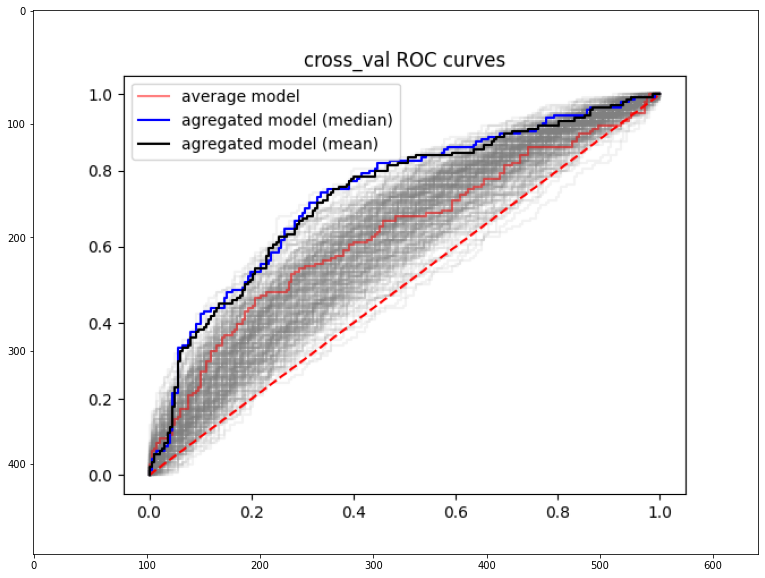

base2
AUC [0.6481143542019177, 0.04404085213475138]


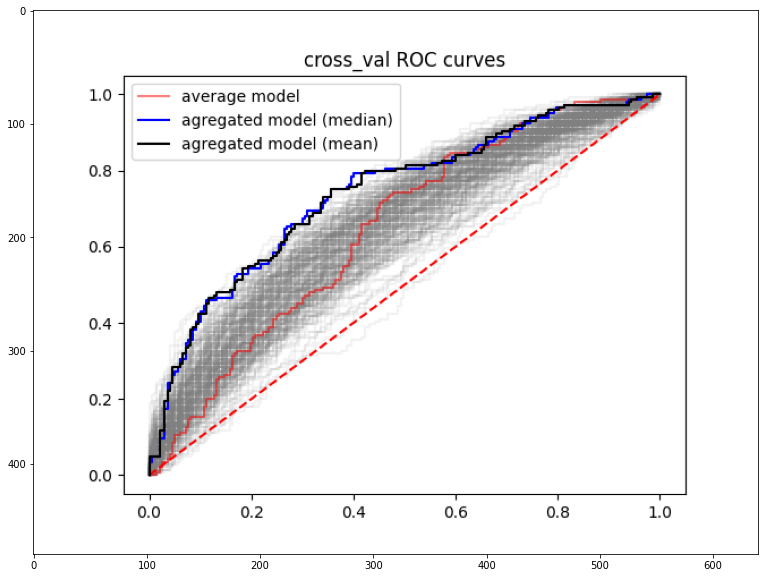

drop_rate_0
AUC [0.6541638465877044, 0.04183625292598137]


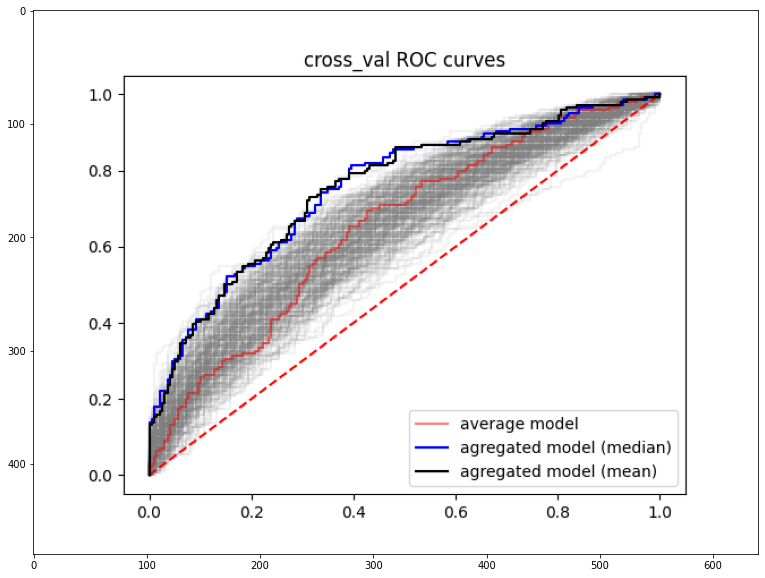

base1
AUC [0.673959108855048, 0.04164537487356842]


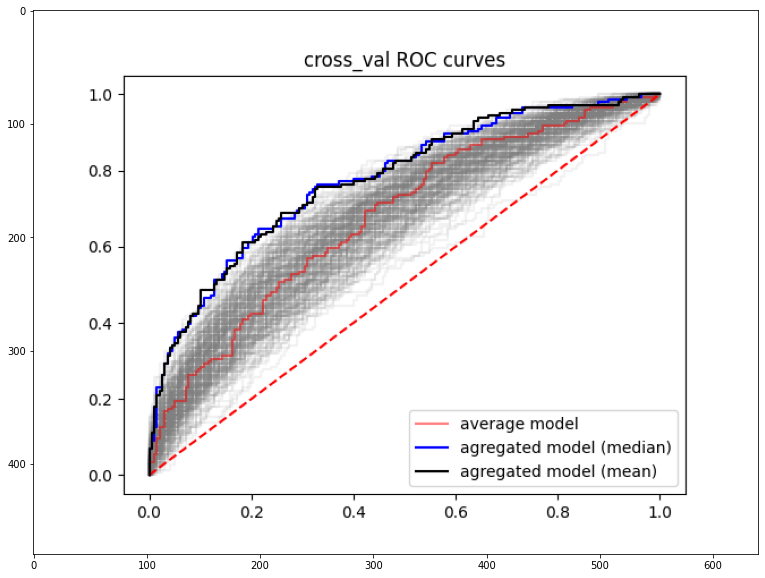

1mm_no_4
AUC [0.4884705301748449, 0.035179791318902316]


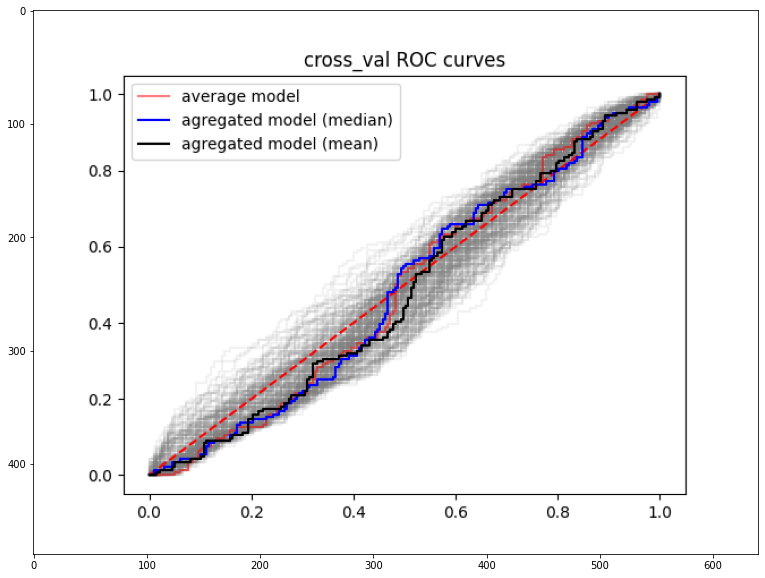

1mm_fold_30
AUC [0.5865493513818387, 0.03723043254420536]


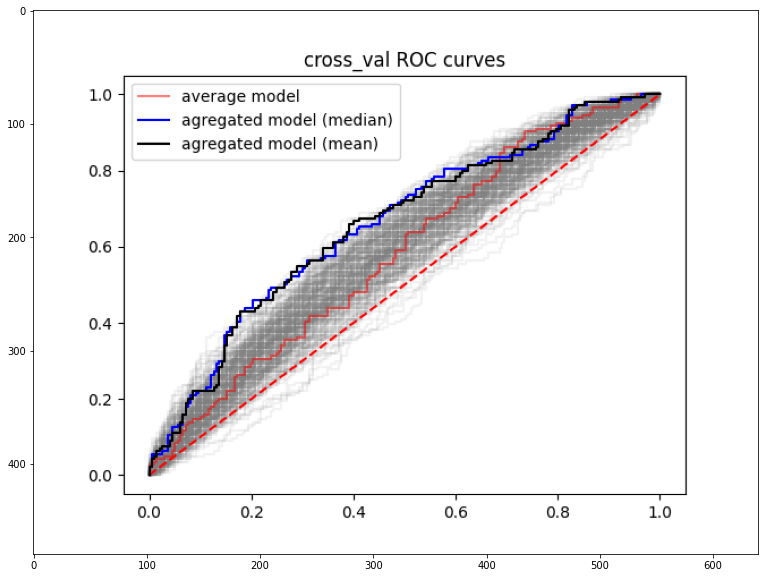

base3
AUC [0.6447695995487873, 0.040686019034973216]


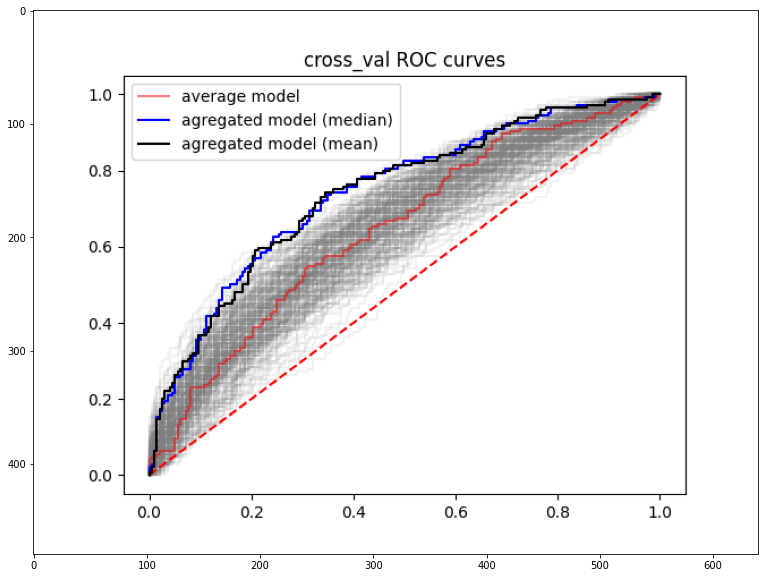

1mm_no_30
AUC [0.5822251833051325, 0.041573037169192716]


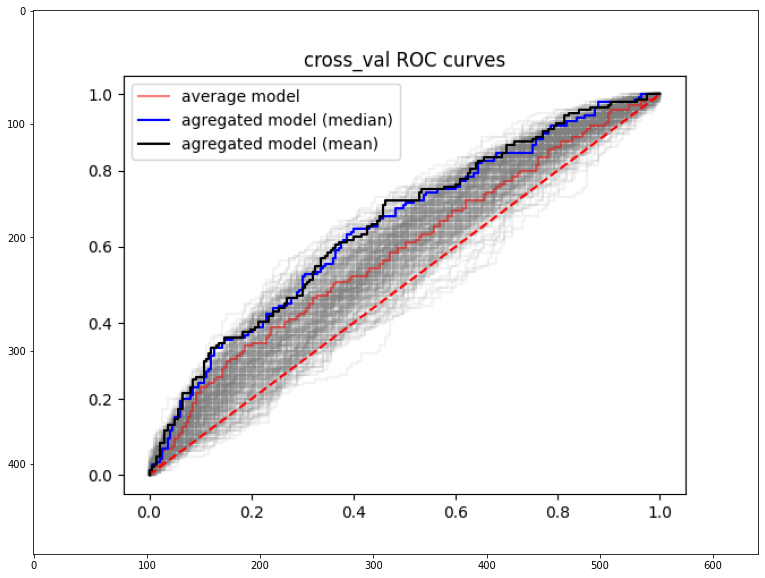

path       auc   auc_std  accuracy  accuracy_std
0          joel_4  0.480352  0.022429  0.549314      0.014923
1      1mm_fold_4  0.574575  0.063551  0.555718      0.051553
2   drop_rate_0.6  0.530619  0.044917  0.518217      0.051808
3             T_1  0.655674  0.039235  0.618815      0.039304
4   drop_rate_0.3  0.609882  0.047839  0.585232      0.038250
5           T_0.5  0.624267  0.045173  0.595320      0.039513
6   batch_size_64  0.636690  0.044784  0.606639      0.035734
7         joel_30  0.650462  0.043823  0.614733      0.037777
8     1mm_no_4(2)  0.569888  0.046849  0.552891      0.040838
9    batch_size_4  0.617623  0.044589  0.590909      0.040715
10         T_0.01  0.626335  0.050238  0.598792      0.041902
11          base2  0.648114  0.044041  0.611543      0.037142
12    drop_rate_0  0.654164  0.041836  0.616446      0.036519
13          base1  0.673959  0.041645  0.629466      0.034312
14       1mm_no_4  0.488471  0.035180  0.548809      0.032750
15    1mm_fold_30  0.586549  0.037230  0.562088      0.034258
16          base3  0.644770  0.040686  0.610534      0.032800
17      1mm_no_30  0.582225  0.041573  0.553138      0.043799

In [8]:
# convnet exploration
excluded_conditions = []

results_df = show_results("/neurospin/dico/agaudin/Runs/03_monkeys/Output/convnet_exploration",
excluded_conditions=excluded_conditions)

results_df

In [9]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

path       auc
13          base1  0.673959
3             T_1  0.655674
12    drop_rate_0  0.654164
7         joel_30  0.650462
11          base2  0.648114
16          base3  0.644770
6   batch_size_64  0.636690
10         T_0.01  0.626335
5           T_0.5  0.624267
9    batch_size_4  0.617623
4   drop_rate_0.3  0.609882
15    1mm_fold_30  0.586549
17      1mm_no_30  0.582225
1      1mm_fold_4  0.574575
8     1mm_no_4(2)  0.569888
2   drop_rate_0.6  0.530619
14       1mm_no_4  0.488471
0          joel_4  0.480352

In [11]:
# directories are supposed to have a certain structure and name patterns
def get_results_table(dir_path, model_types=['convnet', 'densenet2'], verbose=False):
    results = {k: {} for k in model_types}

    for model_type in os.listdir(dir_path):
        if model_type in model_types:
            if verbose:
                print(model_type)
            path = os.path.join(dir_path, model_type)
            for params in os.listdir(path):
                params_path = os.path.join(path, params)
                if os.path.isdir(params_path):
                    if verbose:
                        print(params)
                    
                    n_models = 0

                    if model_type == 'pca':
                        results[model_type]['foldlabel_'+params] = 0
                        results[model_type]['no_foldlabel_'+params] = 0
                    else:    
                        results[model_type][params] = 0
                    
                    for model in os.listdir(params_path):
                        model_path = os.path.join(params_path, model)
                        # start a model name by & to filter it out of the performance analysis
                        if os.path.isdir(model_path) and model[0] != '&':
                            if verbose:
                                print(model)

                            n_models += 1

                            if model_type == 'pca':
                                values = os.path.join(params_path, model, 'values.json')
                                with open(values, 'r') as file:
                                    values = json.load(file)
                                results[model_type]['foldlabel_'+params] += values['cross_val_auc'][0]
                                results[model_type]['no_foldlabel_'+params] += values['cross_val_auc'][0]
                            else:
                                values = os.path.join(params_path, model, 'cingulate_ACCpatterns_embeddings/values.json')
                                with open(values, 'r') as file:
                                    values = json.load(file)
                                results[model_type][params] += values['cross_val_auc'][0]
                    
                    if model_type == 'pca':
                        results[model_type]['foldlabel_'+params] = results[model_type]['foldlabel_'+params]/n_models
                        results[model_type]['no_foldlabel_'+params] = results[model_type]['no_foldlabel_'+params]/n_models
                    else:
                        results[model_type][params] = results[model_type][params]/n_models
    
    results_df = pd.DataFrame(results)
    results_df.sort_index(inplace=True)
    return results_df

In [12]:
dir_path = "/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders"
results_df = get_results_table(dir_path, model_types=['convnet', 'densenet2', 'pca'])

results_df.to_csv("/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders/performance_comparison_5000.csv")

results_df

convnet  densenet2       pca
foldlabel_30     0.613729   0.658608  0.593625
foldlabel_4      0.589703   0.574395  0.538784
no_foldlabel_30  0.649748   0.575910  0.593625
no_foldlabel_4   0.514435   0.488433  0.538784